In [1]:
# Date: 08/04/2021.
# Title: Kaggle House Prices.
# Author: Parmeshwar Prajapati.

### 1. Import modules

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sb

import scipy.stats as scistats
import statsmodels.api as statmod

### 2. Import data

In [236]:
train_path = 'Dataset/train.csv'
test_path = 'Dataset/test.csv'
raw_train = pd.read_csv(train_path)
raw_test = pd.read_csv(test_path)

print(f'Training data shape {raw_train.shape}')
print(f'Testing data shape {raw_test.shape}')

Training data shape (1460, 81)
Testing data shape (1459, 80)


In [3]:
raw_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
# Describe numerical data.

raw_train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
# Describe categorical data.

raw_train.describe(include = 'object')

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,91,1460,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,5,2,2,4,4,2,5,3,25,9,...,6,3,5,5,3,3,4,4,9,6
top,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,1151,1454,50,925,1311,1459,1052,1382,225,1260,...,870,605,1311,1326,1340,3,157,49,1267,1198


#### 2.1 Checking the datatypes

In [6]:
for col in raw_train.columns.to_list():
    print(col + ':', raw_train[col].dtypes)

Id: int64
MSSubClass: int64
MSZoning: object
LotFrontage: float64
LotArea: int64
Street: object
Alley: object
LotShape: object
LandContour: object
Utilities: object
LotConfig: object
LandSlope: object
Neighborhood: object
Condition1: object
Condition2: object
BldgType: object
HouseStyle: object
OverallQual: int64
OverallCond: int64
YearBuilt: int64
YearRemodAdd: int64
RoofStyle: object
RoofMatl: object
Exterior1st: object
Exterior2nd: object
MasVnrType: object
MasVnrArea: float64
ExterQual: object
ExterCond: object
Foundation: object
BsmtQual: object
BsmtCond: object
BsmtExposure: object
BsmtFinType1: object
BsmtFinSF1: int64
BsmtFinType2: object
BsmtFinSF2: int64
BsmtUnfSF: int64
TotalBsmtSF: int64
Heating: object
HeatingQC: object
CentralAir: object
Electrical: object
1stFlrSF: int64
2ndFlrSF: int64
LowQualFinSF: int64
GrLivArea: int64
BsmtFullBath: int64
BsmtHalfBath: int64
FullBath: int64
HalfBath: int64
BedroomAbvGr: int64
KitchenAbvGr: int64
KitchenQual: object
TotRmsAbvGrd: int6

#### 2.2 Converting to required datatype

In [237]:
# 1) Converting 'MSSubClass' to 'object'

raw_train['MSSubClass'] = raw_train['MSSubClass'].astype(str)
raw_train['MSSubClass'] = 'C' + raw_train['MSSubClass']

raw_test['MSSubClass'] = raw_test['MSSubClass'].astype(str)
raw_test['MSSubClass'] = 'C' + raw_test['MSSubClass']

#### 2.3 Columns with more than 25% null values

In [238]:
remove_null_cols_train = raw_train.columns[raw_train.isnull().sum()/raw_train.shape[0]*100 > 25].to_list()
remove_null_cols_test = raw_test.columns[raw_test.isnull().sum()/raw_test.shape[0]*100 > 25].to_list()

# Checking for same null columns in both the data set.

print('Train and test data both have same null columns:', 
       remove_null_cols_train == remove_null_cols_test)

Train and test data both have same null columns: True


In [239]:
# Checking whether the following columns can be dropped directly.

print('Columns to be dropped are:')
print(remove_null_cols_train)

Columns to be dropped are:
['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']


In [240]:
# In the description, 'Alley' doesn't depend on any other feature.
# Null values here means 'No Alley'. Filling the 'NaN' values with 'None or No'.

print('Unique values are:', raw_train['Alley'].unique())

# Filling with 'None'.
raw_train['Alley'].fillna('None', inplace = True)
raw_test['Alley'].fillna('None', inplace = True)

# Cross checking for nulls.
print('Null values in raw_train["Alley"] are:', raw_train['Alley'].isnull().sum().sum())
print('Null values in raw_test["Alley"] are:', raw_test['Alley'].isnull().sum().sum())

Unique values are: [nan 'Grvl' 'Pave']
Null values in raw_train["Alley"] are: 0
Null values in raw_test["Alley"] are: 0


In [241]:
# 'FireplaceQu' depends on 'Fireplace' feature.

print("raw_train['FireplaceQu']:", raw_train['FireplaceQu'].unique())
print("raw_train['Fireplaces']:", raw_train['Fireplaces'].unique())

# Null values here means 'No Fireplace'. 
# Filling the 'NaN' values with 'None or No'.

raw_train['FireplaceQu']: [nan 'TA' 'Gd' 'Fa' 'Ex' 'Po']
raw_train['Fireplaces']: [0 1 2 3]


In [242]:
# Where 'Fireplaces' = '0' --> 'FireplaceQu' should be 'None'.

(raw_train['Fireplaces'] == 0).sum() == raw_train['FireplaceQu'].isnull().sum()

# Filling with 'None'.
raw_train['FireplaceQu'].fillna('None', inplace = True)
raw_test['FireplaceQu'].fillna('None', inplace = True)

# Cross checking for nulls.
print('Null values in raw_train["FireplaceQu"] are:', raw_train['FireplaceQu'].isnull().sum().sum())
print('Null values in raw_test["FireplaceQu"] are:', raw_test['FireplaceQu'].isnull().sum().sum())

Null values in raw_train["FireplaceQu"] are: 0
Null values in raw_test["FireplaceQu"] are: 0


In [243]:
# Similarly 'PoolQC' depends on 'PoolArea'

(raw_train['PoolArea'] == 0).sum() == raw_train['PoolQC'].isnull().sum()

# Filling with 'None'.
raw_train['PoolQC'].fillna('None', inplace = True)
raw_test['PoolQC'].fillna('None', inplace = True)

# Cross checking for nulls.
print('Null values in raw_train["PoolQC"] are:', raw_train['PoolQC'].isnull().sum().sum())
print('Null values in raw_test["PoolQC"] are:', raw_test['PoolQC'].isnull().sum().sum())

Null values in raw_train["PoolQC"] are: 0
Null values in raw_test["PoolQC"] are: 0


In [244]:
# 'Fence' doesn't depend on any other feature.
# Null values here means 'No Fence'. Fill 'NaN' with 'None or No'.

# Filling with 'None'.
raw_train['Fence'].fillna('None', inplace = True)
raw_test['Fence'].fillna('None', inplace = True)

# Cross checking for nulls.
print('Null values in raw_train["Fence"] are:', raw_train['Fence'].isnull().sum().sum())
print('Null values in raw_test["Fence"] are:', raw_test['Fence'].isnull().sum().sum())

Null values in raw_train["Fence"] are: 0
Null values in raw_test["Fence"] are: 0


In [245]:
# 'MiscFeature' doesn't depend on any other feature.
# Null values here means 'None'. Fill 'Nan' with 'None or No'.

# Filling with 'None'.
raw_train['MiscFeature'].fillna('None', inplace = True)
raw_test['MiscFeature'].fillna('None', inplace = True)

# Cross checking for nulls.
print('Null values in raw_train["MiscFeature"] are:', raw_train['MiscFeature'].isnull().sum().sum())
print('Null values in raw_test["MiscFeature"] are:', raw_test['MiscFeature'].isnull().sum().sum())

Null values in raw_train["MiscFeature"] are: 0
Null values in raw_test["MiscFeature"] are: 0


#### 2.4 Dropping columns with low variance

In [246]:
low_var_data = raw_train.var()
print(low_var_data[low_var_data < 0.1])

# Below columns cannot be dropped since their value range is small.

BsmtHalfBath    0.057003
KitchenAbvGr    0.048549
dtype: float64


#### 2.5 Dropping columns with biased data

In [247]:
cat_col = raw_train.select_dtypes(include = 'object').columns.to_list()

for col in cat_col:
    print(col)
    print(raw_train[col].value_counts(), '\n')    

MSSubClass
C20     536
C60     299
C50     144
C120     87
C30      69
C160     63
C70      60
C80      58
C90      52
C190     30
C85      20
C75      16
C45      12
C180     10
C40       4
Name: MSSubClass, dtype: int64 

MSZoning
RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64 

Street
Pave    1454
Grvl       6
Name: Street, dtype: int64 

Alley
None    1369
Grvl      50
Pave      41
Name: Alley, dtype: int64 

LotShape
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64 

LandContour
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64 

Utilities
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64 

LotConfig
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64 

LandSlope
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64 

Neighborhood
NAmes      225
CollgCr    150
OldTown    113
Edwards    10

In [248]:
# Cross checking Utilities column in test data

raw_test['Utilities'].value_counts()

AllPub    1457
Name: Utilities, dtype: int64

In [249]:
# Dropping Utilities column

raw_train.drop(columns = 'Utilities', inplace = True)
raw_test.drop(columns = 'Utilities', inplace = True)

---

### 3. Splitting the data

In [250]:
# Splitting the training data into training and validation set.
# Using Stratified shuffle split as the data is small.

from sklearn.model_selection import StratifiedShuffleSplit

# Creating instance
splitter = StratifiedShuffleSplit(n_splits = 1, test_size = 0.3, 
                                  random_state = 0)

# Creating a dummy column for stratification.
bins = np.linspace(raw_train['SalePrice'].min(), raw_train['SalePrice'].max(),
                   6)
labels = np.arange(1, 6, 1)
raw_train['dum_SalePrice'] = pd.cut(raw_train['SalePrice'], bins = bins, 
                                    labels = labels, include_lowest = True)

for train_index, valid_index in splitter.split(raw_train, raw_train['dum_SalePrice']):
    train_data = raw_train.iloc[train_index]
    valid_data = raw_train.iloc[valid_index]

#### 3.1 Checking the proportions

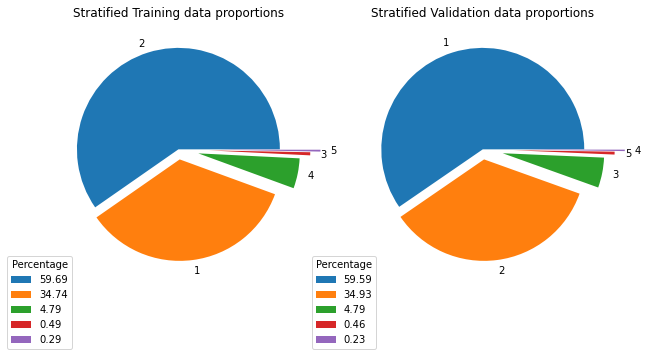

In [26]:
# Training proportions

train_prop = (train_data['dum_SalePrice'].value_counts()/    
              train_data.shape[0]*100).values

# Validation proportions
valid_prop = (valid_data['dum_SalePrice'].value_counts()/
              valid_data.shape[0]*100).values

# Plotting proportions
plt.figure(figsize = (10, 8))

plt.subplot(121)
plt.title('Stratified Training data proportions')
explode = np.arange(0, 0.5, 0.1)
plt.pie(train_prop, labels = train_data['dum_SalePrice'].unique(), 
        explode = explode)
plt.legend((np.round(train_prop, 2)), title = 'Percentage', 
           bbox_to_anchor = (0.1, 0.1))

plt.subplot(122)
plt.title('Stratified Validation data proportions')
explode = np.arange(0, 0.5, 0.1)
plt.pie(valid_prop, labels = valid_data['dum_SalePrice'].unique(), 
        explode = explode)
plt.legend((np.round(valid_prop, 2)), title = 'Percentage', 
           bbox_to_anchor = (0.1, 0.1))
plt.show()

In [251]:
# Proportions are almost same.

# Dropping 'dum_SalePrice' column.
train_data = train_data.drop(columns = 'dum_SalePrice')
valid_data = valid_data.drop(columns = 'dum_SalePrice')

----

### 4. Exploratory Data Analysis

In [252]:
# Before performing EDA, read the description of data and make notes.

set(train_data.columns.to_list())

{'1stFlrSF',
 '2ndFlrSF',
 '3SsnPorch',
 'Alley',
 'BedroomAbvGr',
 'BldgType',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtFinType1',
 'BsmtFinType2',
 'BsmtFullBath',
 'BsmtHalfBath',
 'BsmtQual',
 'BsmtUnfSF',
 'CentralAir',
 'Condition1',
 'Condition2',
 'Electrical',
 'EnclosedPorch',
 'ExterCond',
 'ExterQual',
 'Exterior1st',
 'Exterior2nd',
 'Fence',
 'FireplaceQu',
 'Fireplaces',
 'Foundation',
 'FullBath',
 'Functional',
 'GarageArea',
 'GarageCars',
 'GarageCond',
 'GarageFinish',
 'GarageQual',
 'GarageType',
 'GarageYrBlt',
 'GrLivArea',
 'HalfBath',
 'Heating',
 'HeatingQC',
 'HouseStyle',
 'Id',
 'KitchenAbvGr',
 'KitchenQual',
 'LandContour',
 'LandSlope',
 'LotArea',
 'LotConfig',
 'LotFrontage',
 'LotShape',
 'LowQualFinSF',
 'MSSubClass',
 'MSZoning',
 'MasVnrArea',
 'MasVnrType',
 'MiscFeature',
 'MiscVal',
 'MoSold',
 'Neighborhood',
 'OpenPorchSF',
 'OverallCond',
 'OverallQual',
 'PavedDrive',
 'PoolArea',
 'PoolQC',
 'RoofMatl',
 'RoofStyle

In [17]:
# # Notes:
# # Feature Modifications

#     # Related to floors   
#     '1stFlrSF'
#     '2ndFlrSF'
#     'LowQualFinSF' -- Low quality finished square feet (all floors)

# new feature 'HighQualFinSF' = '1stFlrSF' + '2ndFlrSF' - 'LowQualFinSF'
# new feature '2ndFlrExist' = Boolean value

#     Keep only 'HighQualFinSF', 'LowQualFinSF' and '2ndFlrExist'  

#----------------------------------------------------------------------------
#     # Related to Bsmt
#     'BsmtCond' -- Evaluates the general condition of the basement,
#     'BsmtQual' -- Evaluates the height of the basement,

# new feature = 'BsmtCond'*'BsmtQual'
    
#     'BsmtExposure',
    
#     'BsmtFinSF1' -- Type 1 finished square feet,
#     'BsmtFinSF2' -- Type 2 finished square feet,
#     'BsmtFinType1' -- Rating of basement finished area,
#     'BsmtFinType2' -- Rating of basement finished area,
#     'BsmtUnfSF'

# new feature = 'BsmtFinSF1'*'BsmtFinType1' 
#             + 'BsmtFinSF2'*'BsmtFinType2' 
#             + 'BsmtUnfSF'*Unfinished_grade(ie 1 from 'BsmtFinType1' 
#                                                  and 'BsmtFinType2')
    
#     'BsmtFullBath',
#     'BsmtHalfBath',

# new feature = 'BsmtFullBath' + 2*'BsmtHalfBath'

#-----------------------------------------------------------------------------
#     # Related to External
#     'ExterCond',
#     'ExterQual',

# new feature = 'ExterCond'*'ExterQual'

#-----------------------------------------------------------------------------
#     # Related to Fireplaces
#     'Fireplaces',
#     'FireplaceQu',

# new feature = 'Fireplaces'*'FireplaceQu'

#-----------------------------------------------------------------------------
#     # Related to Garage
#     'GarageArea', 'GarageCars' -- Drop any one,
#     'GarageCond',
#     'GarageFinish',
#     'GarageQual',

# new feature = 'GarageCond'*'GarageQual'*'GarageFinish'

#     'GarageType',
#     'GarageYrBlt',

# train_data['GarageYrBlt'].isnull().sum().sum() = 51
# Fill the corresponding garage related values with 'NA'

#-----------------------------------------------------------------------------

#     'GrLivArea',

#------------------------------------------------------------------------------
#     # Related to heating
#     'Heating',
#     'HeatingQC',
# Plot how these features depend and according to the graph use

# new feature = 'Heating'*'HeatingQC'

#------------------------------------------------------------------------------
#     # Related to Kitchen
#     'KitchenAbvGr',
#     'KitchenQual'
# Plot how these features depend and according to the graph use

# new feature = 'KitchenAbvGr'*'KitchenQual'

#------------------------------------------------------------------------------
#     # Related to Overall
#     'OverallCond',
#     'OverallQual'

# new feature = 'OverallCond'*'OverallQual'
# Both of the features depend on other features.
# Use in the first model and drop in the second model and check the changes

#------------------------------------------------------------------------------
#     # Related to Overall
#     'FullBath', 
#     'HalfBath'

# new feature = 'FullBath' + 2*'HalfBath'

#------------------------------------------------------------------------------
#     # Related to Pool
#     'PoolArea',
#     'PoolQC'

# new feature = 'PoolArea'*'PoolQC'

#------------------------------------------------------------------------------

# # Less important features
# 1) 'Id'

#------------------------------------------------------------------------------
# # Ordinal features
# 'BsmtCond',
# 'BsmtExposure',
# 'BsmtFinType1',
# 'BsmtFinType2',
# 'BsmtQual',
# 'ExterCond',
# 'ExterQual',
# 'Functional',
# 'GarageCond',
# 'GarageFinish',
# 'GarageQual',
# 'HeatingQC'

# Other necessary changes will be done in Feature Engineering

#### 4.1 Checking for valid zeros

In [253]:
zero_cols_train = train_data.columns[(train_data == 0).sum() > 0].to_list()
zero_cols_valid = valid_data.columns[(valid_data == 0).sum() > 0].to_list()
zero_cols_test = raw_test.columns[(raw_test == 0).sum() > 0].to_list()

print(f'Columns with zeros are: \n{set(zero_cols_train + zero_cols_valid + zero_cols_test)}')

Columns with zeros are: 
{'KitchenAbvGr', 'MasVnrArea', 'BsmtHalfBath', 'OpenPorchSF', 'BsmtFinSF2', 'ScreenPorch', 'BsmtFullBath', 'GarageCars', 'PoolArea', 'MiscVal', 'EnclosedPorch', '3SsnPorch', 'Fireplaces', '2ndFlrSF', 'LowQualFinSF', 'BedroomAbvGr', 'WoodDeckSF', 'BsmtFinSF1', 'BsmtUnfSF', 'HalfBath', 'FullBath', 'TotalBsmtSF', 'GarageArea'}


In [30]:
# All the features above can have zero value

# Columns with zeros should have 'zeros' or 'None' in the 
# corresponding dependent columns.

# 1. 'GarageArea' needs to be checked for 'GarageYrBlt' otherwise it can 
#     have zero values.

# 2. If 'TotalBsmtSF' is zero then all features related to it 
#    must be zero or 'None'.

# 3. 'GarageCars' and 'GarageArea' both of them are measuring the capacity
#     of Garage. So, we can drop any one of them. 'GarageCars' are less
#     correlated to 'SalePrice' as compared to 'GarageArea'.
#     Dropping 'GarageCars'.

# 4. 'KitchenAbvGr' cannot have zero values as 'KitchenQual' doesn't have
#    'No Kitchen' value in it. ('KitchenAbvGr' needs to be filled.)

# 5. 'MasVnrArea' and 'MasVnrType' depend on eachother.

# Rest features can have zero values.

In [254]:
# 1. 'GarageArea'
# 'GarageArea' can be zero only if Garage was not build.
# checking for null values in 'GarageYrBlt'

print("'GarageYrBlt' has null values:",
      (train_data['GarageYrBlt'].isnull()).sum())

# If 'GarageYrBlt' is null then all values associated with it must be zero
# or 'None'.

print(" Checking 'GarageYrBlt' and other dependent features null values:", 
        ((train_data['GarageYrBlt'].isnull()) & 
         (train_data['GarageQual'].isnull()) &
         (train_data['GarageType'].isnull()) &
         (train_data['GarageFinish'].isnull()) &
         (train_data['GarageCond'].isnull())).sum())

print("'GarageCars' and 'GarageArea' with zeros:", 
     ((train_data['GarageCars'] == 0) & 
      (train_data['GarageArea'] == 0)).sum())

'GarageYrBlt' has null values: 51
 Checking 'GarageYrBlt' and other dependent features null values: 51
'GarageCars' and 'GarageArea' with zeros: 51


In [255]:
# Filling the features related to 'Garage' with 'None' or 'zeros'.

garage_cols = ['GarageQual', 'GarageType', 'GarageFinish', 'GarageCond']

train_data['GarageYrBlt'].fillna(0, inplace = True)
valid_data['GarageYrBlt'].fillna(0, inplace = True)
raw_test['GarageYrBlt'].fillna(0, inplace = True)

train_data.loc[:, garage_cols] = train_data.loc[:, garage_cols].fillna('None')
valid_data.loc[:, garage_cols] = valid_data.loc[:, garage_cols].fillna('None')
raw_test.loc[:, garage_cols] = raw_test.loc[:, garage_cols].fillna('None')

In [256]:
# Cross checking for null values in 'Garage' features.

train_data.loc[:, garage_cols].isnull().sum()

GarageQual      0
GarageType      0
GarageFinish    0
GarageCond      0
dtype: int64

In [257]:
# 2. 'TotalBsmtSF'

print("'TotalBsmtSF' has zero values:",
      (train_data['TotalBsmtSF'] == 0).sum())

print(' Null values in BsmtCond:', train_data['BsmtCond'].isnull().sum())
print(' Null values in BsmtExposure:', train_data['BsmtExposure'].isnull().sum())
print(' Null values in BsmtQual:', train_data['BsmtQual'].isnull().sum())
print(' Null values in BsmtFinType1:', train_data['BsmtFinType1'].isnull().sum())
print(' Null values in BsmtFinType2:', train_data['BsmtFinType2'].isnull().sum())

'TotalBsmtSF' has zero values: 24
 Null values in BsmtCond: 24
 Null values in BsmtExposure: 25
 Null values in BsmtQual: 24
 Null values in BsmtFinType1: 24
 Null values in BsmtFinType2: 25


In [258]:
bsmt_cols1 = ['BsmtCond', 'BsmtExposure', 'BsmtQual', 
             'BsmtFinType1', 'BsmtFinType2']
bsmt_cols2 = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF']

condition = train_data['TotalBsmtSF'] == 0
train_data.loc[condition, bsmt_cols1] = 'None'
train_data.loc[condition, bsmt_cols2] = 0

condition = valid_data['TotalBsmtSF'] == 0
valid_data.loc[condition, bsmt_cols1] = 'None'
valid_data.loc[condition, bsmt_cols2] = 0

condition = raw_test['TotalBsmtSF'] == 0
raw_test.loc[condition, bsmt_cols1] = 'None'
raw_test.loc[condition, bsmt_cols2] = 0

In [259]:
# Cross checking

print(' Null values in BsmtCond:', train_data['BsmtCond'].isnull().sum())
print(' Null values in BsmtExposure:', train_data['BsmtExposure'].isnull().sum())
print(' Null values in BsmtQual:', train_data['BsmtQual'].isnull().sum())
print(' Null values in BsmtFinType1:', train_data['BsmtFinType1'].isnull().sum())
print(' Null values in BsmtFinType2:', train_data['BsmtFinType2'].isnull().sum())

 Null values in BsmtCond: 0
 Null values in BsmtExposure: 1
 Null values in BsmtQual: 0
 Null values in BsmtFinType1: 0
 Null values in BsmtFinType2: 1


In [37]:
# Remaining null values will be imputed.

In [260]:
# 3. Dropping 'GarageCars'

train_data.drop(columns = 'GarageCars', inplace = True)
valid_data.drop(columns = 'GarageCars', inplace = True)
raw_test.drop(columns = 'GarageCars', inplace = True)

In [261]:
# 4. 'KitchenAbvGr'

print('train_data["KitchenAbvGr"] zero vals:',
      (train_data['KitchenAbvGr'] == 0).sum())
print('valid_data["KitchenAbvGr"] zero vals:',
      (valid_data['KitchenAbvGr'] == 0).sum())
print('raw_test["KitchenAbvGr"] zero vals:',
      (raw_test['KitchenAbvGr'] == 0).sum())

train_data["KitchenAbvGr"] zero vals: 0
valid_data["KitchenAbvGr"] zero vals: 1
raw_test["KitchenAbvGr"] zero vals: 2


In [262]:
# Filling with mode

valid_data['KitchenAbvGr'].replace(to_replace = 0, 
                                   value = (valid_data['KitchenAbvGr']).mode()[0],
                                   inplace = True)

raw_test['KitchenAbvGr'].replace(to_replace = 0, 
                                 value = (raw_test['KitchenAbvGr']).mode()[0],
                                 inplace = True)

In [263]:
# Cross checking

print('train_data["KitchenAbvGr"] zero vals:',
      (train_data['KitchenAbvGr'] == 0).sum())
print('valid_data["KitchenAbvGr"] zero vals:',
      (valid_data['KitchenAbvGr'] == 0).sum())
print('raw_test["KitchenAbvGr"] zero vals:',
      (raw_test['KitchenAbvGr'] == 0).sum())

train_data["KitchenAbvGr"] zero vals: 0
valid_data["KitchenAbvGr"] zero vals: 0
raw_test["KitchenAbvGr"] zero vals: 0


In [264]:
# 5. 'MasVnrArea'

# Train data
cond = train_data['MasVnrArea'] == 0

# Filling with 'None'
train_data.loc[cond, 'MasVnrType'] = 'None'

# Valid data
cond = valid_data['MasVnrArea'] == 0

# Filling with 'None'
valid_data.loc[cond, 'MasVnrType'] = 'None'


# Test data
cond = raw_test['MasVnrArea'] == 0

# Filling with 'None'
raw_test.loc[cond, 'MasVnrType'] = 'None'

In [265]:
# Cross checking 

print('train_data["MasVnrType"] null vals:',
      (train_data['MasVnrType'].isnull()).sum())
print('valid_data["MasVnrType"] null vals:',
      (valid_data['MasVnrType'].isnull()).sum())
print('raw_test["MasVnrType"] null vals:',
      (raw_test['MasVnrType'].isnull()).sum())

train_data["MasVnrType"] null vals: 6
valid_data["MasVnrType"] null vals: 2
raw_test["MasVnrType"] null vals: 16


In [266]:
# Filling the rest of null values using mode

train_data['MasVnrType'].fillna((train_data['MasVnrType']).mode()[0],
                                inplace = True)

valid_data['MasVnrType'].fillna((valid_data['MasVnrType']).mode()[0],
                                 inplace = True)

raw_test['MasVnrType'].fillna((raw_test['MasVnrType']).mode()[0],
                               inplace = True)

In [267]:
# Cross checking 

print('train_data["MasVnrType"] null vals:',
      (train_data['MasVnrType'].isnull()).sum())
print('valid_data["MasVnrType"] null vals:',
      (valid_data['MasVnrType'].isnull()).sum())
print('raw_test["MasVnrType"] null vals:',
      (raw_test['MasVnrType'].isnull()).sum())

train_data["MasVnrType"] null vals: 0
valid_data["MasVnrType"] null vals: 0
raw_test["MasVnrType"] null vals: 0


#### 4.2 Imputing data

In [268]:
train_null_cols = train_data.columns[train_data.isnull().sum() > 0].to_list()
valid_null_cols = valid_data.columns[valid_data.isnull().sum() > 0].to_list()
test_null_cols = raw_test.columns[raw_test.isnull().sum() > 0].to_list()

all_null_cols = list(set(train_null_cols + valid_null_cols + test_null_cols))

print('Combined null columns are: ')
print(all_null_cols)

Combined null columns are: 
['MasVnrArea', 'BsmtHalfBath', 'BsmtFinType1', 'BsmtFinType2', 'Electrical', 'MSZoning', 'BsmtFinSF2', 'LotFrontage', 'BsmtQual', 'BsmtFullBath', 'BsmtExposure', 'Exterior1st', 'Functional', 'BsmtCond', 'SaleType', 'Exterior2nd', 'KitchenQual', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', 'GarageArea']


In [269]:
# Columns to be filled with mean or median.

mean_med_cols = ['BsmtFinSF2', 'GarageArea', 'MasVnrArea', 'TotalBsmtSF', 
                 'LotFrontage', 'BsmtUnfSF', 'BsmtFinSF1']

# Columns to be filled with mode only.
mode_cols = ['SaleType', 'BsmtFinType2', 'Electrical', 'BsmtQual', 
             'KitchenQual', 'BsmtExposure', 'BsmtFullBath', 'Functional', 
             'MSZoning', 'Exterior2nd', 'BsmtFinType1', 'BsmtHalfBath', 
             'Exterior1st', 'BsmtCond']

In [270]:
# Cross checking for Object data types

(set(mode_cols) - set(train_data[all_null_cols].select_dtypes(include = 'object').columns))

{'BsmtFullBath', 'BsmtHalfBath'}

In [49]:
# Importing required modules

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [271]:
# Strategy of filling mean_med_cols

mean_med_strat = 'mean'

# Strategy of filling mode_cols
mode_strat = 'most_frequent'

# Pipeline
mean_med_pipeline = Pipeline([('mean_med_pip', 
                               SimpleImputer(strategy = mean_med_strat))])
mode_pipeline = Pipeline([('mode_pip', SimpleImputer(strategy = mode_strat))])

# ColumnTransformer
my_pipeline = ColumnTransformer([('mean_med_coltrans', mean_med_pipeline, 
                                  mean_med_cols), 
                                 ('mode_coltrans', mode_pipeline, mode_cols)])

# Transforming data
transformed_array_train = my_pipeline.fit_transform(train_data[all_null_cols])
transformed_array_valid = my_pipeline.transform(valid_data[all_null_cols])
transformed_array_test = my_pipeline.transform(raw_test[all_null_cols])

transformed_train_data = pd.DataFrame(transformed_array_train,
                                      columns = mean_med_cols + mode_cols)
transformed_valid_data = pd.DataFrame(transformed_array_valid,
                                      columns = mean_med_cols + mode_cols)
transformed_test_data = pd.DataFrame(transformed_array_test,
                                     columns = mean_med_cols + mode_cols)

# To avoid 'NaN' values due to indexing use reset index.
temp_train_data = train_data.drop(columns = all_null_cols)
temp_train_data.reset_index(drop=True, inplace=True) 

temp_valid_data = valid_data.drop(columns = all_null_cols)
temp_valid_data.reset_index(drop=True, inplace=True)

temp_test_data = raw_test.drop(columns = all_null_cols)
temp_test_data.reset_index(drop=True, inplace=True)

# Transformed data
ttrain_data = pd.concat([transformed_train_data, temp_train_data], axis = 1)
tvalid_data = pd.concat([transformed_valid_data, temp_valid_data], axis = 1)
ttest_data = pd.concat([transformed_test_data, temp_test_data], axis = 1)

In [272]:
# Checking for null values.

print(f'Null values in ttrain_data: {ttrain_data.isnull().sum().sum()}')
print(f'Null values in tvalid_data: {tvalid_data.isnull().sum().sum()}')
print(f'Null values in ttest_data: {ttest_data.isnull().sum().sum()}')

print(f'\nShape of train_data: {train_data.shape}')
print(f'Shape of valid_data: {valid_data.shape}')
print(f'Shape of raw_test: {raw_test.shape}')

print(f'\nShape of ttrain_data: {ttrain_data.shape}')
print(f'Shape of tvalid_data: {tvalid_data.shape}')
print(f'Shape of ttest_data: {ttest_data.shape}')

Null values in ttrain_data: 0
Null values in tvalid_data: 0
Null values in ttest_data: 0

Shape of train_data: (1022, 79)
Shape of valid_data: (438, 79)
Shape of raw_test: (1459, 78)

Shape of ttrain_data: (1022, 79)
Shape of tvalid_data: (438, 79)
Shape of ttest_data: (1459, 78)


#### 4.3 Checking the dtypes

In [273]:
# The dtypes were changed after the transformation.
# Applying the correct datatype to each column.

for col in ttrain_data.columns:
    if type(ttrain_data[col][0]) != str:
        ttrain_data[col] = ttrain_data[col].astype(type(ttrain_data[col][0]))
        
for col in tvalid_data.columns:
    if type(tvalid_data[col][0]) != str:
        tvalid_data[col] = tvalid_data[col].astype(type(tvalid_data[col][0]))
        
for col in ttest_data.columns:
    if type(ttest_data[col][0]) != str:
        ttest_data[col] = ttest_data[col].astype(type(ttest_data[col][0]))

---

### 5. Assumptions for Linear Regression
1) 'y' should be a linear function of 'X'.<br>
2) 'X' should be independent of eacthother not be a linear combination of eachother.<br>
3) Data should be normally distributed.<br>
4) No outliers.

#### 5.1 'y' should be a linear function of 'X'

In [274]:
corr_matrix = train_data.corr()
corr_vals = corr_matrix['SalePrice'].sort_values(ascending = False)
low_pos_corr = corr_vals[(corr_vals > 0) & (corr_vals < 0.29)]
low_pos_corr_cols = low_pos_corr.keys().to_list()
print('Columns with Low positive correlation:')
print(low_pos_corr)

low_neg_corr = corr_vals[(corr_vals < 0) & (corr_vals > -0.29)]
low_neg_corr_cols = low_neg_corr.keys().to_list()
print('\nColumns with Low negative correlation:')
print(low_neg_corr)

low_corr_cols = low_pos_corr_cols + low_neg_corr_cols

Columns with Low positive correlation:
LotArea         0.289584
HalfBath        0.263770
GarageYrBlt     0.251286
BsmtFullBath    0.241427
BsmtUnfSF       0.198490
BedroomAbvGr    0.171215
PoolArea        0.119484
ScreenPorch     0.117934
MoSold          0.066167
3SsnPorch       0.050732
Name: SalePrice, dtype: float64

Columns with Low negative correlation:
LowQualFinSF    -0.011482
MiscVal         -0.011692
BsmtFinSF2      -0.011849
Id              -0.027031
BsmtHalfBath    -0.030807
YrSold          -0.042353
OverallCond     -0.082663
KitchenAbvGr    -0.118847
EnclosedPorch   -0.127507
Name: SalePrice, dtype: float64


#### 5.2 'X' should be independent of eacthother

In [275]:
# Checking for linear correlations between the features.

from itertools import combinations

def multicolinearity(data, thresh):
    cols = data.select_dtypes(exclude = 'object').columns.to_list()
    
    if 'SalePrice' in cols:
        cols.remove('SalePrice')
    
    comb_cols = list(combinations(cols, 2))
    
    multicol_cols = []
    
    for col1, col2 in comb_cols:
        if scistats.pearsonr(data[col1], data[col2])[0] > thresh:
            multicol_cols.append((col1, col2))
        else:
            pass
        
    return multicol_cols

In [55]:
multicol_cols = multicolinearity(ttrain_data, 0.5)
multicol_cols

# The following columns need to be dropped or transformed to reduce
# multicolinearity.

[('GarageArea', 'OverallQual'),
 ('GarageArea', '1stFlrSF'),
 ('GarageArea', 'GarageYrBlt'),
 ('TotalBsmtSF', 'BsmtFinSF1'),
 ('TotalBsmtSF', 'OverallQual'),
 ('TotalBsmtSF', '1stFlrSF'),
 ('BsmtFinSF1', 'BsmtFullBath'),
 ('OverallQual', 'YearBuilt'),
 ('OverallQual', 'YearRemodAdd'),
 ('OverallQual', 'GrLivArea'),
 ('OverallQual', 'FullBath'),
 ('YearBuilt', 'YearRemodAdd'),
 ('1stFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'GrLivArea'),
 ('2ndFlrSF', 'HalfBath'),
 ('2ndFlrSF', 'BedroomAbvGr'),
 ('2ndFlrSF', 'TotRmsAbvGrd'),
 ('GrLivArea', 'FullBath'),
 ('GrLivArea', 'BedroomAbvGr'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('FullBath', 'TotRmsAbvGrd'),
 ('BedroomAbvGr', 'TotRmsAbvGrd')]

#### 5.3 Data should be normally distributed

In [276]:
# Using Shapiro's test for checking Normal Distribution.

def ND_func(data):
#     H0 --> Data is ND
#     H1 --> Data is not ND
#     if p_val < 0.05, reject H0
#     if p_val > 0.05, accept H0

    dist_col = {}
    dist_col['ND'] = []
    dist_col['NND'] = []
    
    num_cols = data.select_dtypes(exclude = 'object').columns.to_list()
    
    for col in num_cols:
        p_val = scistats.normaltest(data[col])[1]
        
        if p_val < 0.05:
            dist_col['NND'].append(col)
        elif p_val > 0.05:
            dist_col['ND'].append(col)
    
    if len(dist_col['NND']) > 0:
        print('Data is not Normally Distributed.')
    print('Normally Distributed columns are: \n', dist_col['ND'])
    
    return dist_col

In [277]:
dist_col = ND_func(ttrain_data)

Data is not Normally Distributed.
Normally Distributed columns are: 
 []


In [278]:
# Data Transformation is required.

#### 5.4 Checking for outliers

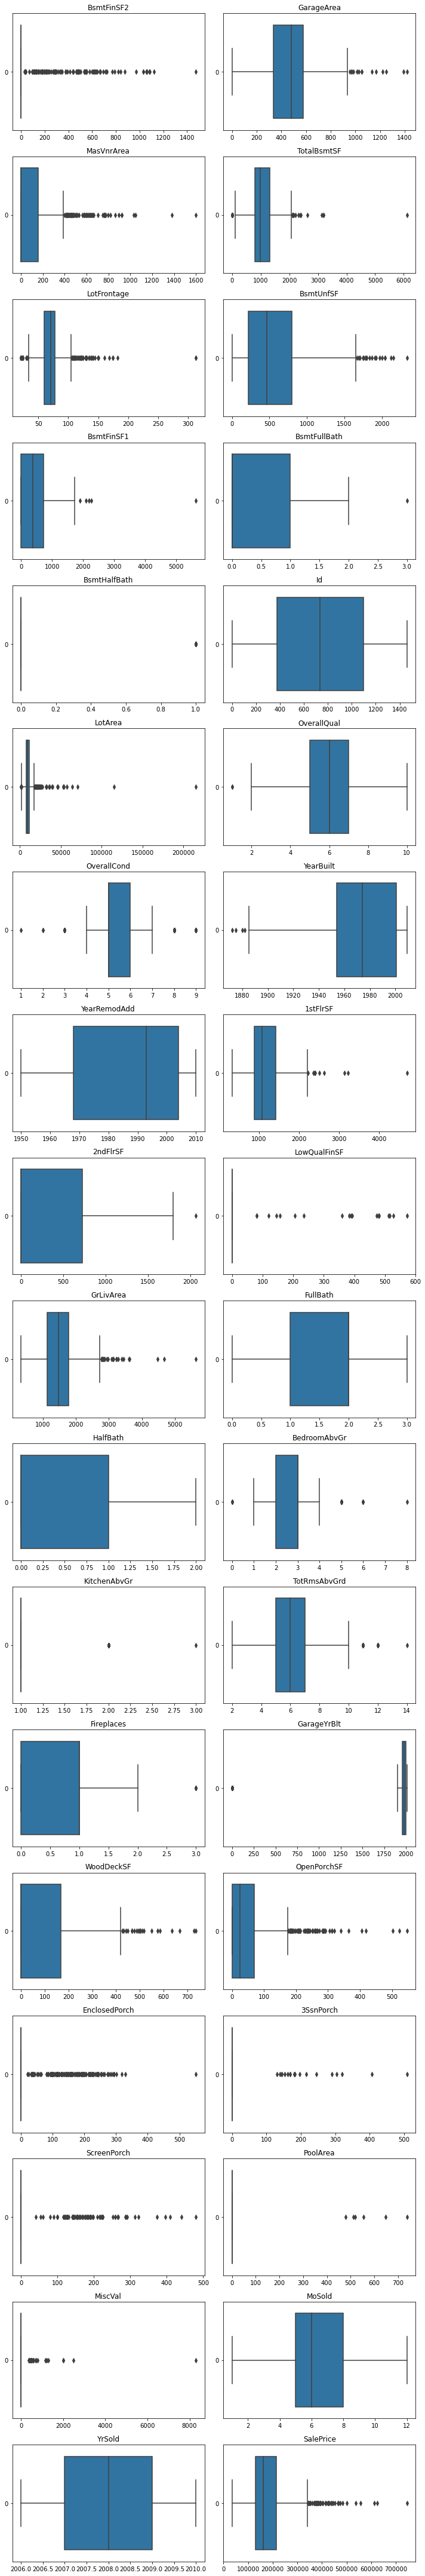

In [279]:
num_cols = ttrain_data.select_dtypes(exclude = 'object').columns.to_list()

i = 0
plt.figure(figsize = (10, 60))
for num_col in num_cols:
    i += 1
    plt.subplot(int(np.ceil(len(num_cols)/2)), 2, i)
    sb.boxplot(data = ttrain_data[num_col], orient = 'h')
    plt.title(num_col)
    plt.tight_layout()

In [280]:
# Outliers are observed.

---

### 6. Feature Engineering

#### 6.1 Analyzing low correlated features from section 5.1

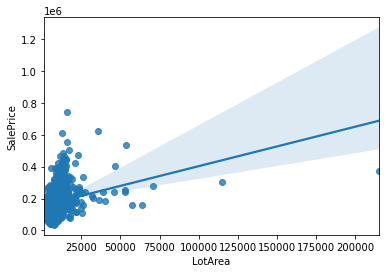

In [59]:
# 1. 'LotArea'

sb.regplot(x = 'LotArea', y = 'SalePrice', data = ttrain_data)
plt.show()

# As Area increases Price should increase. 
# But 'LotArea' above 30000 is not showing this trend.

#-------------------------------------------------------------------
# Conclusion: Remove the outliers only and don't drop 'LotArea'.
# Outliers present

In [281]:
# Removing 'LorArea' outliers

ttrain_data = ttrain_data[ttrain_data['LotArea'] < 75000] # 30000

In [61]:
def without_zeros(x, y = 'SalePrice', data = ttrain_data):
    plt.figure(figsize = (6,6))
    plt.subplot(211)
    sb.regplot(x = x, y = y, data = data)
    plt.title('With zeros')
    
    print('%Non-zero values is: ', 
          str(np.round(data[data[x] > 0].shape[0]/data.shape[0]*100, 
                       2)) + ' %')
    print('Corr without zeros: ', 
          np.round(scistats.pearsonr(data[data[x] > 0][x], 
                                     data[data[x] > 0]['SalePrice'])[0], 4))
    
    plt.subplot(212)
    sb.regplot(x = data[data[x] > 0][x], 
               y = data[data[x] > 0]['SalePrice'], data = ttrain_data)
    plt.title('Without zeros')
    plt.tight_layout()

%Non-zero values is:  37.16 %
Corr without zeros:  -0.0956


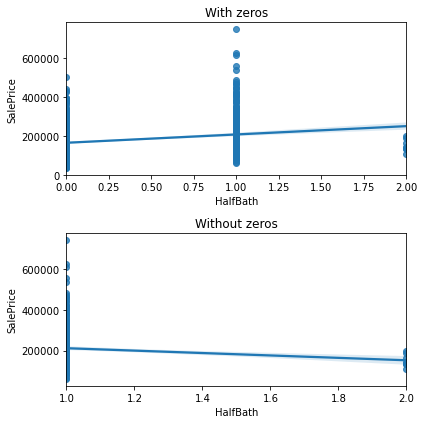

In [62]:
# 2. 'HalfBath'

# The data has too many zeros
# Checking performance without zeros

without_zeros('HalfBath', y = 'SalePrice', data = ttrain_data)

# Conclusion: Cannot be removed since it is trying to decrease
# the SalePrice.

%Non-zero values is:  92.16 %
Corr without zeros:  0.1594


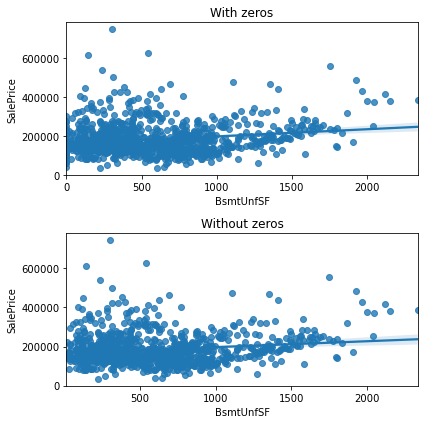

In [63]:
# 3. 'BsmtUnfSF'

without_zeros('BsmtUnfSF', y = 'SalePrice', data = ttrain_data)

# Conclusion: Not sure what to do.

%Non-zero values is:  99.61 %
Corr without zeros:  0.1812


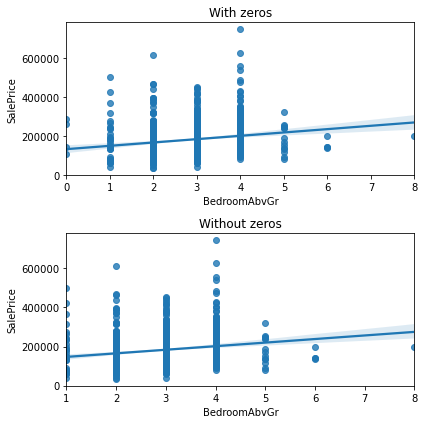

In [64]:
# 4. 'BedroomAbvGr'

without_zeros('BedroomAbvGr', y = 'SalePrice', data = ttrain_data)

# Conclusion: 'SalePrice' should increase with increase in 'Bedrooms'. 
# But values from '5' are not showing this trend. 

%Non-zero values is:  0.59 %
Corr without zeros:  -0.0138


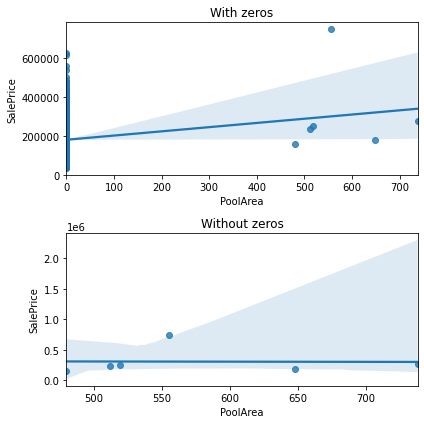

In [65]:
# 5. 'PoolArea'

without_zeros('PoolArea', y = 'SalePrice', data = ttrain_data)

# Conclusion: Most of the values are zero. 
# Without zeros corr is negative.
# Hence, keeping this column.

%Non-zero values is:  7.65 %
Corr without zeros:  0.3676


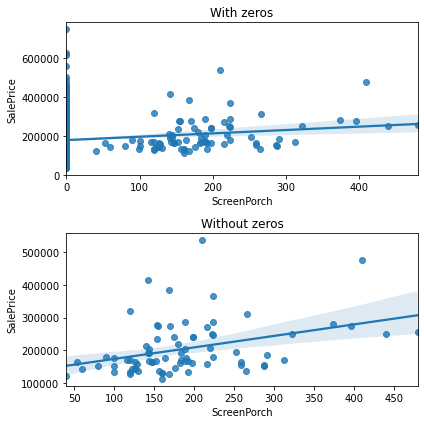

In [66]:
# 6. 'ScreenPorch'

without_zeros('ScreenPorch', y = 'SalePrice', data = ttrain_data)

# Conclusion: Most of the values are zero. Without zeros corr is 0.3676.
# Hence, keeping this column.

%Non-zero values is:  100.0 %
Corr without zeros:  0.067


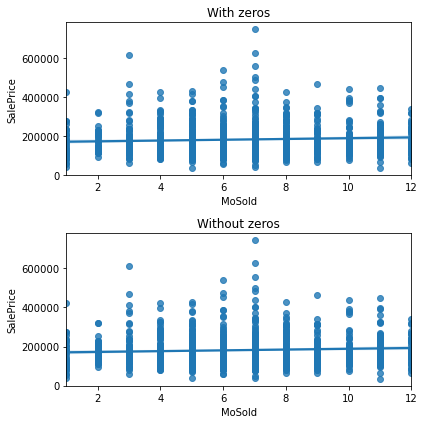

In [67]:
# 7. 'MoSold'

without_zeros('MoSold', y = 'SalePrice', data = ttrain_data)

# Conclusion: Try adding with YearSold else drop it.

%Non-zero values is:  1.86 %
Corr without zeros:  -0.0141


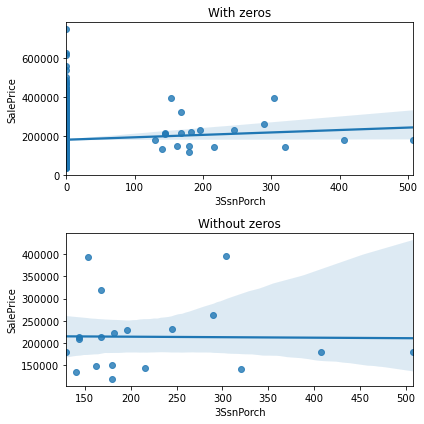

In [68]:
# 8. '3SsnPorch'

without_zeros('3SsnPorch', y = 'SalePrice', data = ttrain_data)

# Conclusion: Most of the values are zero. Without zeros corr is negative.
# Hence, keeping this column.

%Non-zero values is:  1.76 %
Corr without zeros:  0.3935


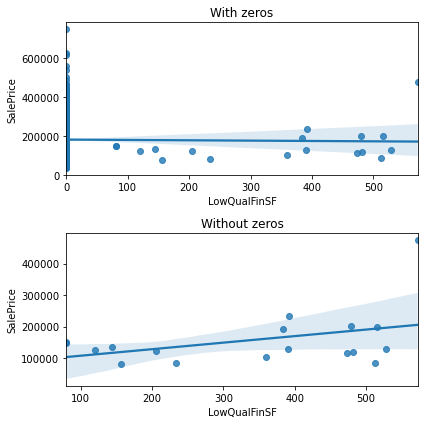

In [69]:
# 9. 'LowQualFinSF'

without_zeros('LowQualFinSF', y = 'SalePrice', data = ttrain_data)

# Conclusion: Most of the values are zero. Without zeros corr is 0.3935.
# Hence, keeping this column.

%Non-zero values is:  3.33 %
Corr without zeros:  0.2755


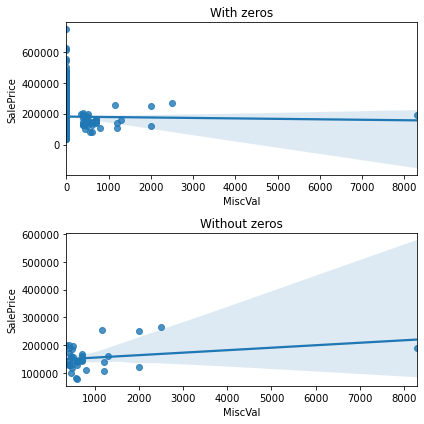

In [70]:
# 10. 'MiscVal'

without_zeros('MiscVal', y = 'SalePrice', data = ttrain_data)

# Conclusion: Most of the values are zero. 
# Without zeros corr is 0.2755.
# Hence, keeping this column.

#--------------------------------------------------------------------
# Removing the outlier

In [282]:
# Removing 'MiscVal' outliers

ttrain_data = ttrain_data[ttrain_data['MiscVal'] < 8000]

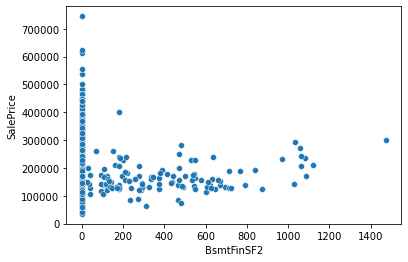

In [181]:
# 11. 'BsmtFinSF2'

# without_zeros('BsmtFinSF2', y = 'SalePrice', data = ttrain_data)
sb.scatterplot(x = 'BsmtFinSF2', y = 'SalePrice', data = ttrain_data)
plt.show()

# Conclusion: Most of the values are zero.
# Keeping this column.

In [283]:
# Removing outliers

ttrain_data = ttrain_data[ttrain_data['BsmtFinSF2'] < 1400]

%Non-zero values is:  100.0 %
Corr without zeros:  -0.0427


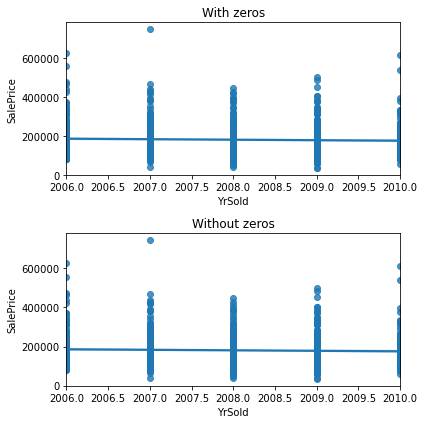

In [73]:
# 12. 'YrSold'

without_zeros('YrSold', y = 'SalePrice', data = ttrain_data)

# Conclusion: Cannot be removed since it is trying to 
# decrease the SalePrice. Add "MonSold" with 'YrSold'.

%Non-zero values is:  100.0 %
Corr without zeros:  -0.1202


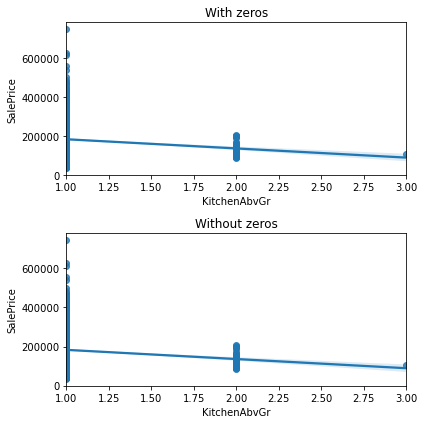

In [74]:
# 13. 'KitchenAbvGr'

without_zeros('KitchenAbvGr', y = 'SalePrice', data = ttrain_data)

# Conclusion: Cannot be removed since it is trying to decrease 
# the SalePrice.

%Non-zero values is:  13.95 %
Corr without zeros:  0.2159


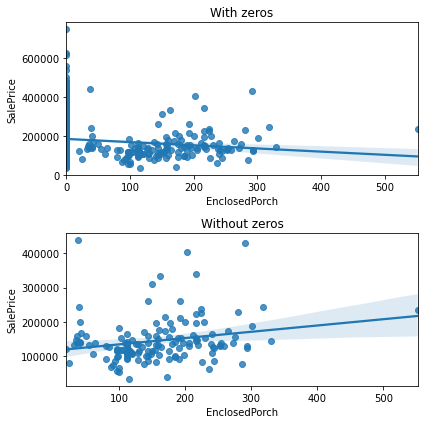

In [75]:
# 13. 'EnclosedPorch'

without_zeros('EnclosedPorch', y = 'SalePrice', data = ttrain_data)

# Conclusion: Most of the values are zero. 
# Without zeros corr is 0.2147.
# Hence, keeping this column.

#-------------------------------------------------------------------
# Removing outliers.

In [284]:
# Removing outliers

ttrain_data = ttrain_data[ttrain_data['EnclosedPorch'] < 500]

#### 6.2 Combining or Removing features

In [285]:
# # Notes:
# # Feature Modifications

#     # Related to floors   
#     '1stFlrSF'
#     '2ndFlrSF'
#     'LowQualFinSF' -- Low quality finished square feet (all floors)

# new feature 'HighQualFinSF' = '1stFlrSF' + '2ndFlrSF' - 'LowQualFinSF'
# new feature '2ndFlrExist' = Boolean value

#     Keep only 'HighQualFinSF' and 'LowQualFinSF'   
# Not using grades for now

#----------------------------------------------------------------------------
#     # Related to Bsmt
#     'BsmtCond' -- Evaluates the general condition of the basement,
#     'BsmtQual' -- Evaluates the height of the basement,

# new feature = 'BsmtCond'*'BsmtQual'
    
#     'BsmtExposure',
    
#     'BsmtFinSF1' -- Type 1 finished square feet,
#     'BsmtFinSF2' -- Type 2 finished square feet,
#     'BsmtFinType1' -- Rating of basement finished area,
#     'BsmtFinType2' -- Rating of basement finished area,
#     'BsmtUnfSF'

# new feature = 'BsmtFinSF1'*'BsmtFinType1' 
#             + 'BsmtFinSF2'*'BsmtFinType2' 
#             + 'BsmtUnfSF'*Unfinished_grade(ie 1 from 'BsmtFinType1' 
#                                                  and 'BsmtFinType2')
    
#     'BsmtFullBath',
#     'BsmtHalfBath',

# new feature = 'BsmtFullBath' + 2*'BsmtHalfBath'

#-----------------------------------------------------------------------------
#     # Related to External
#     'ExterCond',
#     'ExterQual',

# new feature = 'ExterCond'*'ExterQual'

#-----------------------------------------------------------------------------
#     # Related to Fireplaces
#     'Fireplaces',
#     'FireplaceQu',

# new feature = 'Fireplaces'*'FireplaceQu'

#-----------------------------------------------------------------------------
#     # Related to Garage
#     'GarageArea', 'GarageCars' -- Drop any one,
#     'GarageCond',
#     'GarageFinish',
#     'GarageQual',

# new feature = 'GarageCond'*'GarageQual'*'GarageFinish'

#     'GarageType',
#     'GarageYrBlt',

# train_data['GarageYrBlt'].isnull().sum().sum() = 51
# Fill the corresponding garage related values with 'NA'

#-----------------------------------------------------------------------------

#     'GrLivArea',

#------------------------------------------------------------------------------
#     # Related to heating
#     'Heating',
#     'HeatingQC',
# Plot how these features depend and according to the graph use

# new feature = 'Heating'*'HeatingQC'

#------------------------------------------------------------------------------
#     # Related to Kitchen
#     'KitchenAbvGr',
#     'KitchenQual'
# Plot how these features depend and according to the graph use

# new feature = 'KitchenAbvGr'*'KitchenQual'

#------------------------------------------------------------------------------
#     # Related to Overall
#     'OverallCond',
#     'OverallQual'

# new feature = 'OverallCond'*'OverallQual'
# Both of the features depend on other features.
# Use in the first model and drop in the second model and check the changes

#------------------------------------------------------------------------------
#     # Related to Overall
#     'FullBath', 
#     'HalfBath'

# new feature = 'FullBath' + 2*'HalfBath'

#------------------------------------------------------------------------------
#     # Related to Pool
#     'PoolArea',
#     'PoolQC'

# new feature = 'PoolArea'*'PoolQC'

#------------------------------------------------------------------------------
#     # Related to Porch
#     'WoodDeckSF',
#     'OpenPorchSF'
#     'EnclosedPorch'
#     '3SsnPorch' 
#     'ScreenPorch'

# new feature = 'WoodDeckSF' + 'OpenPorchSF' + 'EnclosedPorch'
#             + '3SsnPorch' + 'ScreenPorch'

#------------------------------------------------------------------------------
# # Less important features
# 1) 'Id'

In [286]:
# Ordinal features taken from notes

ordinal_cols_notes = ['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 
                      'BsmtFinType2','BsmtQual', 'ExterCond', 
                      'ExterQual', 'Functional', 'GarageCond',
                      'GarageFinish', 'GarageQual', 'HeatingQC', 
                      'FireplaceQu', 'KitchenQual', 'PoolQC']

print(ordinal_cols_notes)

['BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'BsmtQual', 'ExterCond', 'ExterQual', 'Functional', 'GarageCond', 'GarageFinish', 'GarageQual', 'HeatingQC', 'FireplaceQu', 'KitchenQual', 'PoolQC']


In [287]:
# Checking categorical data for low and high cardinality.

two_cat_cols = []
low_cardi_cols = []
high_cardi_cols = []

for col in ttrain_data.select_dtypes(include = 'object').keys().to_list():
    s = len(set(ttrain_data[col].unique()))
    if s <= 2:
        two_cat_cols.append(col)
        
    elif s <= 10:
        low_cardi_cols.append(col)
    
    else:
        high_cardi_cols.append(col)

        
# Columns on which log transformation cannot be applied.
no_log_trans = two_cat_cols + low_cardi_cols + high_cardi_cols

In [288]:
for col in two_cat_cols:
    print(col + ':', ttrain_data[col].unique())

Street: ['Pave' 'Grvl']
CentralAir: ['Y' 'N']


In [289]:
def mapping(col, unique_vals):
    ttrain_data[col] = ttrain_data[col].map({unique_vals[0]: 1,
                                             unique_vals[1]: 0})
    tvalid_data[col] = tvalid_data[col].map({unique_vals[0]: 1,
                                             unique_vals[1]: 0})
    ttest_data[col] = ttest_data[col].map({unique_vals[0]: 1,
                                           unique_vals[1]: 0})

In [290]:
mapping('Street', ['Pave', 'Grvl'])
mapping('CentralAir', ['Y', 'N'])

In [291]:
# Cross checking

ttrain_data['Street'].unique()
ttrain_data['CentralAir'].unique()

array([1, 0], dtype=int64)

In [292]:
# Selecting the ordinal columns.

import itertools

cardi_cols = low_cardi_cols + high_cardi_cols
ordinal_cols = []
ordinal_vals = []
nominal_cols = []

for col in cardi_cols:
    unique_vals = ttrain_data[col].unique()
    if (('TA' in unique_vals) or ('Ex' in unique_vals) 
        or ('Gd' in unique_vals) or ('ALQ' in unique_vals)
        or ('BLQ' in unique_vals) or ('Min1' in unique_vals)
        or ('Maj1' in unique_vals) or ('RFn' in unique_vals)):
        ordinal_cols.append(col)
        ordinal_vals.append(unique_vals)
        print(f'{col}: {unique_vals}')
    else:
        nominal_cols.append(col)
        
print(set(list(itertools.chain(*ordinal_vals))))

BsmtFinType2: ['Unf' 'Rec' 'None' 'LwQ' 'ALQ' 'BLQ' 'GLQ']
BsmtQual: ['Gd' 'Fa' 'TA' 'Ex' 'None']
KitchenQual: ['TA' 'Gd' 'Ex' 'Fa']
BsmtExposure: ['Av' 'No' 'Gd' 'None' 'Mn']
Functional: ['Typ' 'Maj2' 'Mod' 'Min1' 'Min2' 'Maj1' 'Sev']
BsmtFinType1: ['Unf' 'GLQ' 'LwQ' 'BLQ' 'Rec' 'ALQ' 'None']
BsmtCond: ['Gd' 'Po' 'TA' 'None' 'Fa']
ExterQual: ['Gd' 'TA' 'Ex' 'Fa']
ExterCond: ['TA' 'Fa' 'Gd' 'Ex']
HeatingQC: ['Ex' 'Gd' 'TA' 'Fa' 'Po']
FireplaceQu: ['Gd' 'None' 'TA' 'Po' 'Fa' 'Ex']
GarageFinish: ['Fin' 'Unf' 'RFn' 'None']
GarageQual: ['TA' 'Po' 'None' 'Fa' 'Gd' 'Ex']
GarageCond: ['TA' 'Po' 'None' 'Fa' 'Gd' 'Ex']
PoolQC: ['None' 'Gd' 'Fa' 'Ex']
{'BLQ', 'LwQ', 'TA', 'Ex', 'Unf', 'Mod', 'None', 'Fa', 'Mn', 'Rec', 'Min1', 'Maj1', 'Av', 'Typ', 'Po', 'Sev', 'Min2', 'RFn', 'Maj2', 'No', 'GLQ', 'Gd', 'Fin', 'ALQ'}


In [293]:
# Cross checking the ordinal columns with ordinal columns from notes.

set(ordinal_cols_notes) - set(ordinal_cols)

set()

In [294]:
# Above empty set represents that I have considered all the ordinal columns.

In [295]:
# Imputing ordinal values. (refer the data description)

ttrain_data = ttrain_data.replace(
    {
        'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 
                        'BLQ': 4, 'ALQ': 5,  'GLQ': 6},
        'BsmtQual': {'None': 0, 'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}, 
        'KitchenQual': {'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}, 
        'BsmtExposure': {'No': 0, 'None': 0, 'Mn': 1, 'Av': 2, 'Gd': 3},
        'Functional': {'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5,
                       'Min2': 6, 'Min1': 7, 'Typ': 8}, 
        'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3 , 
                         'BLQ': 4, 'ALQ': 5,  'GLQ': 6},
        'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4},
        'ExterQual': {'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}, 
        'ExterCond': {'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5},
        'HeatingQC': {'Po': 1, 'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5},
        'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 
                        'TA': 3, 'Gd': 4, 'Ex': 5},
        'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}, 
        'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2,'TA': 3,'Gd': 4, 'Ex': 5},
        'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2,'TA': 3,'Gd': 4, 'Ex': 5},
        'PoolQC': {'None': 0, 'Fa': 2,'Gd': 4,'Ex': 5}
    })

tvalid_data = tvalid_data.replace(
    {
        'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 
                         'BLQ': 4, 'ALQ': 5,  'GLQ': 6},
        'BsmtQual': {'None': 0, 'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}, 
        'KitchenQual': {'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}, 
        'BsmtExposure': {'No': 0, 'None': 0, 'Mn': 1, 'Av': 2, 'Gd': 3},
        'Functional': {'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5,
                       'Min2': 6, 'Min1': 7, 'Typ': 8}, 
        'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3 , 
                         'BLQ': 4, 'ALQ': 5,  'GLQ': 6},
        'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4},
        'ExterQual': {'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}, 
        'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5},
        'HeatingQC': {'Po': 1, 'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5},
        'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 
                        'TA': 3, 'Gd': 4, 'Ex': 5},
        'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}, 
        'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2,'TA': 3,'Gd': 4, 'Ex': 5},
        'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2,'TA': 3,'Gd': 4, 'Ex': 5},
        'PoolQC': {'None': 0, 'Fa': 2,'Gd': 4,'Ex': 5}
    })

ttest_data = ttest_data.replace(
    {
        'BsmtFinType2': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3, 
                         'BLQ': 4, 'ALQ': 5,  'GLQ': 6},
        'BsmtQual': {'None': 0, 'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}, 
        'KitchenQual': {'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5}, 
        'BsmtExposure': {'No': 0, 'None': 0, 'Mn': 1, 'Av': 2, 'Gd': 3},
        'Functional': {'Sev': 2, 'Maj2': 3, 'Maj1': 4, 'Mod': 5,
                       'Min2': 6, 'Min1': 7, 'Typ': 8}, 
        'BsmtFinType1': {'None': 0, 'Unf': 1, 'LwQ': 2, 'Rec': 3 , 
                         'BLQ': 4, 'ALQ': 5,  'GLQ': 6},
        'BsmtCond': {'None': 0, 'Po': 1, 'Fa': 2, 'TA': 3, 'Gd': 4},
        'ExterQual': {'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5}, 
        'ExterCond': {'Po': 1, 'Fa': 2, 'TA': 3,'Gd': 4, 'Ex': 5},
        'HeatingQC': {'Po': 1, 'Fa': 2,'TA': 3,'Gd': 4,'Ex': 5},
        'FireplaceQu': {'None': 0, 'Po': 1, 'Fa': 2, 
                        'TA': 3, 'Gd': 4, 'Ex': 5},
        'GarageFinish': {'None': 0, 'Unf': 1, 'RFn': 2, 'Fin': 3}, 
        'GarageQual': {'None': 0, 'Po': 1, 'Fa': 2,'TA': 3,'Gd': 4, 'Ex': 5},
        'GarageCond': {'None': 0, 'Po': 1, 'Fa': 2,'TA': 3,'Gd': 4, 'Ex': 5},
        'PoolQC': {'None': 0, 'Fa': 2,'Gd': 4,'Ex': 5}
    })

In [296]:
# Cross checking for object columns.

print(ttrain_data[ordinal_cols].select_dtypes(include = 'object').keys().to_list())
print(tvalid_data[ordinal_cols].select_dtypes(include = 'object').keys().to_list())
print(ttest_data[ordinal_cols].select_dtypes(include = 'object').keys().to_list())

[]
[]
[]


In [297]:
# Above empty list represents that all ordinal columns have been filled.

In [298]:
# Combining data (refer notes and data description)
# Related to floors

ttrain_data['HighQualFinSF'] = (ttrain_data['1stFlrSF'] 
                              + ttrain_data['2ndFlrSF']
                              - ttrain_data['LowQualFinSF'])
ttrain_data['2ndFlrExists'] = ttrain_data['2ndFlrSF'] != 0

tvalid_data['HighQualFinSF'] = (tvalid_data['1stFlrSF'] 
                              + tvalid_data['2ndFlrSF']
                              - tvalid_data['LowQualFinSF'])
tvalid_data['2ndFlrExists'] = tvalid_data['2ndFlrSF'] != 0

ttest_data['HighQualFinSF'] = (ttest_data['1stFlrSF'] 
                             + ttest_data['2ndFlrSF']
                             - ttest_data['LowQualFinSF'])
ttest_data['2ndFlrExists'] = ttest_data['2ndFlrSF'] != 0

# Dropping '1stFlrSF' and '2ndFlrSF'.
ttrain_data.drop(columns = ['1stFlrSF', '2ndFlrSF'], inplace = True)
tvalid_data.drop(columns = ['1stFlrSF', '2ndFlrSF'], inplace = True)
ttest_data.drop(columns = ['1stFlrSF', '2ndFlrSF'], inplace = True)

In [299]:
# Related to Bsmt

# Dropping 'TotalBsmtSF' as it is addition of 'BsmtFinSF1', 'BsmtFinSF2', 
# 'BsmtUnfSF'

print(all(ttrain_data['BsmtFinSF1'] 
        + ttrain_data['BsmtFinSF2'] 
        + ttrain_data['BsmtUnfSF'] == ttrain_data['TotalBsmtSF']))

ttrain_data['BsmtGrade'] = ttrain_data['BsmtCond']*ttrain_data['BsmtQual']
tvalid_data['BsmtGrade'] = tvalid_data['BsmtCond']*tvalid_data['BsmtQual']
ttest_data['BsmtGrade'] = ttest_data['BsmtCond']*ttest_data['BsmtQual']

ttrain_data.drop(columns = ['BsmtCond', 'BsmtQual'], inplace = True)
tvalid_data.drop(columns = ['BsmtCond', 'BsmtQual'], inplace = True)
ttest_data.drop(columns = ['BsmtCond', 'BsmtQual'], inplace = True)

# Ordinal value given to 'Unf' in 'BsmtFinType1' is 1.
Unfinished_grade = 1     
ttrain_data['BsmtFinSFGrade'] = (ttrain_data['BsmtFinSF1']*ttrain_data['BsmtFinType1']
                               + ttrain_data['BsmtFinSF2']*ttrain_data['BsmtFinType2']
                               + ttrain_data['BsmtUnfSF']*Unfinished_grade)
tvalid_data['BsmtFinSFGrade'] = (tvalid_data['BsmtFinSF1']*tvalid_data['BsmtFinType1']
                               + tvalid_data['BsmtFinSF2']*tvalid_data['BsmtFinType2']
                               + tvalid_data['BsmtUnfSF']*Unfinished_grade)
ttest_data['BsmtFinSFGrade'] = (ttest_data['BsmtFinSF1']*ttest_data['BsmtFinType1']
                              + ttest_data['BsmtFinSF2']*ttest_data['BsmtFinType2']
                              + ttest_data['BsmtUnfSF']*Unfinished_grade)

drop_cols = ['BsmtFinSF1', 'BsmtFinSF2', 'BsmtFinType1', 
             'BsmtFinType2', 'BsmtUnfSF', 'TotalBsmtSF']

ttrain_data.drop(columns = drop_cols, inplace = True)
tvalid_data.drop(columns = drop_cols, inplace = True)
ttest_data.drop(columns = drop_cols, inplace = True)        
        
ttrain_data['BsmtBath'] = (ttrain_data['BsmtFullBath'] 
                         + 2*ttrain_data['BsmtHalfBath'])
tvalid_data['BsmtBath'] = (tvalid_data['BsmtFullBath'] 
                         + 2*tvalid_data['BsmtHalfBath'])
ttest_data['BsmtBath'] = (ttest_data['BsmtFullBath'] 
                        + 2*ttest_data['BsmtHalfBath'])

ttrain_data.drop(columns = ['BsmtFullBath', 'BsmtHalfBath'], inplace = True)
tvalid_data.drop(columns = ['BsmtFullBath', 'BsmtHalfBath'], inplace = True)
ttest_data.drop(columns = ['BsmtFullBath', 'BsmtHalfBath'], inplace = True) 

True


In [300]:
# Related to External

ttrain_data['ExterGrade'] = ttrain_data['ExterCond']*ttrain_data['ExterQual']
tvalid_data['ExterGrade'] = tvalid_data['ExterCond']*tvalid_data['ExterQual']
ttest_data['ExterGrade'] = ttest_data['ExterCond']*ttest_data['ExterQual']

ttrain_data.drop(columns = ['ExterCond', 'ExterQual'], inplace = True)
tvalid_data.drop(columns = ['ExterCond', 'ExterQual'], inplace = True)
ttest_data.drop(columns = ['ExterCond', 'ExterQual'], inplace = True) 

In [301]:
# Related to Fireplace

ttrain_data['FireplaceGrade'] = ttrain_data['Fireplaces']*ttrain_data['FireplaceQu']
tvalid_data['FireplaceGrade'] = tvalid_data['Fireplaces']*tvalid_data['FireplaceQu']
ttest_data['FireplaceGrade'] = ttest_data['Fireplaces']*ttest_data['FireplaceQu']

ttrain_data.drop(columns = ['Fireplaces', 'FireplaceQu'], inplace = True)
tvalid_data.drop(columns = ['Fireplaces', 'FireplaceQu'], inplace = True)
ttest_data.drop(columns = ['Fireplaces', 'FireplaceQu'], inplace = True) 

In [302]:
# Related to Garage

ttrain_data['GarageGrade'] = (ttrain_data['GarageCond']*
                              ttrain_data['GarageQual']*
                              ttrain_data['GarageFinish'])
tvalid_data['GarageGrade'] = (tvalid_data['GarageCond']*
                              tvalid_data['GarageQual']*
                              tvalid_data['GarageFinish'])
ttest_data['GarageGrade'] = (ttest_data['GarageCond']*
                             ttest_data['GarageQual']*
                             ttest_data['GarageFinish'])

drop_cols = ['GarageCond', 'GarageQual', 'GarageFinish']

ttrain_data.drop(columns = drop_cols, inplace = True)
tvalid_data.drop(columns = drop_cols, inplace = True)
ttest_data.drop(columns = drop_cols, inplace = True) 

In [303]:
# More modification for 'Garage'

ttrain_data['GarageGrad'] = ttrain_data['GarageArea']*ttrain_data['GarageGrade']
tvalid_data['GarageGrad'] = tvalid_data['GarageArea']*tvalid_data['GarageGrade']
ttest_data['GarageGrad'] = ttest_data['GarageArea']*ttest_data['GarageGrade']

ttrain_data.drop(columns = ['GarageArea', 'GarageGrade'], inplace = True)
tvalid_data.drop(columns = ['GarageArea', 'GarageGrade'], inplace = True)
ttest_data.drop(columns = ['GarageArea', 'GarageGrade'], inplace = True) 

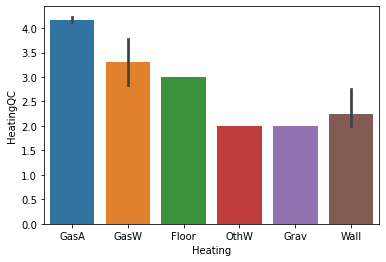

In [165]:
# Related to heating
# 'Heating' is a string valued column. No modification done in this column.

sb.barplot(x = 'Heating', y = 'HeatingQC', data = ttrain_data)
plt.show()

In [304]:
# Related to Kitchen

ttrain_data['KitchenGrade'] = ttrain_data['KitchenAbvGr']*ttrain_data['KitchenQual']
tvalid_data['KitchenGrade'] = tvalid_data['KitchenAbvGr']*tvalid_data['KitchenQual']
ttest_data['KitchenGrade'] = ttest_data['KitchenAbvGr']*ttest_data['KitchenQual']

ttrain_data.drop(columns = ['KitchenAbvGr', 'KitchenQual'], inplace = True)
tvalid_data.drop(columns = ['KitchenAbvGr', 'KitchenQual'], inplace = True)
ttest_data.drop(columns = ['KitchenAbvGr', 'KitchenQual'], inplace = True) 

In [305]:
# Related to Overall

ttrain_data['OverallGrade'] = ttrain_data['OverallCond']*ttrain_data['OverallQual']
tvalid_data['OverallGrade'] = tvalid_data['OverallCond']*tvalid_data['OverallQual']
ttest_data['OverallGrade'] = ttest_data['OverallCond']*ttest_data['OverallQual']

ttrain_data.drop(columns = ['OverallCond', 'OverallQual'], inplace = True)
tvalid_data.drop(columns = ['OverallCond', 'OverallQual'], inplace = True)
ttest_data.drop(columns = ['OverallCond', 'OverallQual'], inplace = True) 

In [306]:
# Related to Bath

ttrain_data['Bath'] = ttrain_data['FullBath'] + 2*ttrain_data['HalfBath']
tvalid_data['Bath'] = tvalid_data['FullBath'] + 2*tvalid_data['HalfBath']
ttest_data['Bath'] = ttest_data['FullBath'] + 2*ttest_data['HalfBath']

ttrain_data.drop(columns = ['FullBath', 'HalfBath'], inplace = True)
tvalid_data.drop(columns = ['FullBath', 'HalfBath'], inplace = True)
ttest_data.drop(columns = ['FullBath', 'HalfBath'], inplace = True) 

In [307]:
# Related to Pool

ttrain_data['PoolGrade'] = ttrain_data['PoolArea']*ttrain_data['PoolQC']
tvalid_data['PoolGrade'] = tvalid_data['PoolArea']*tvalid_data['PoolQC']
ttest_data['PoolGrade'] = ttest_data['PoolArea']*ttest_data['PoolQC']

ttrain_data.drop(columns = ['PoolArea', 'PoolQC'], inplace = True)
tvalid_data.drop(columns = ['PoolArea', 'PoolQC'], inplace = True)
ttest_data.drop(columns = ['PoolArea', 'PoolQC'], inplace = True) 

In [308]:
# Related to Porch

ttrain_data['PorchTotal'] = (ttrain_data['WoodDeckSF'] 
                          + ttrain_data['OpenPorchSF']
                          + ttrain_data['EnclosedPorch']
                          + ttrain_data['3SsnPorch']
                          + ttrain_data['ScreenPorch'])
tvalid_data['PorchTotal'] = (tvalid_data['WoodDeckSF'] 
                          + tvalid_data['OpenPorchSF']
                          + tvalid_data['EnclosedPorch']
                          + tvalid_data['3SsnPorch']
                          + tvalid_data['ScreenPorch'])
ttest_data['PorchTotal'] = (ttest_data['WoodDeckSF'] 
                          + ttest_data['OpenPorchSF']
                          + ttest_data['EnclosedPorch']
                          + ttest_data['3SsnPorch']
                          + ttest_data['ScreenPorch'])

porch_cols = ['WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch',
              '3SsnPorch', 'ScreenPorch']
ttrain_data.drop(columns = porch_cols, inplace = True)
tvalid_data.drop(columns = porch_cols, inplace = True)
ttest_data.drop(columns = porch_cols, inplace = True) 

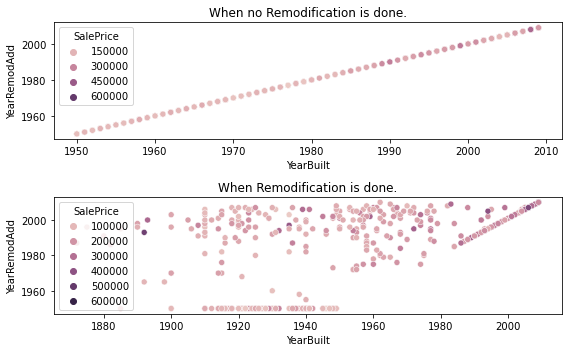

In [78]:
# 'YearBuilt' and 'YearRemodAdd'

plt.figure(figsize = (8, 5))
plt.subplot(211)
df = ttrain_data[ttrain_data['YearBuilt'] == ttrain_data['YearRemodAdd']]
sb.scatterplot(x = 'YearBuilt', y = 'YearRemodAdd', data = df, 
               hue = 'SalePrice')
plt.title('When no Remodification is done.')

plt.subplot(212)
df = ttrain_data[ttrain_data['YearBuilt'] != ttrain_data['YearRemodAdd']]
sb.scatterplot(x = 'YearBuilt', y = 'YearRemodAdd', data = df, 
               hue = 'SalePrice')
plt.title('When Remodification is done.')
plt.tight_layout()
plt.show()

# Conclusion: 

# When house is not remodified then 'SalePrice' increases with 
# 'YearBuilt'. But if remodification is done then 'SalePrice' 
# increases with 'YearRemodAdd'. Dropping 'YearBuilt' as 
# 'YearRemodAdd' is representing the data better.

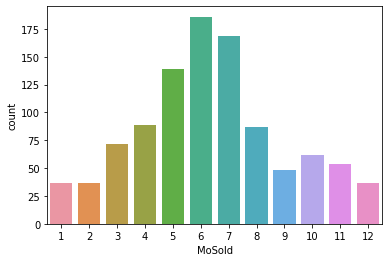

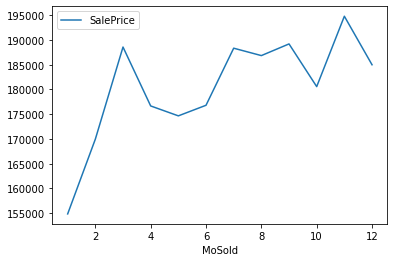

In [120]:
sb.countplot(x = ttrain_data['MoSold'])
ttrain_data[['MoSold', 'SalePrice']].groupby('MoSold').mean().plot()
plt.show()

In [309]:
# Dropping ID 

ttrain_data.drop(columns = 'Id', inplace = True)
tvalid_data.drop(columns = 'Id', inplace = True)
ttest_data.drop(columns = 'Id', inplace = True)

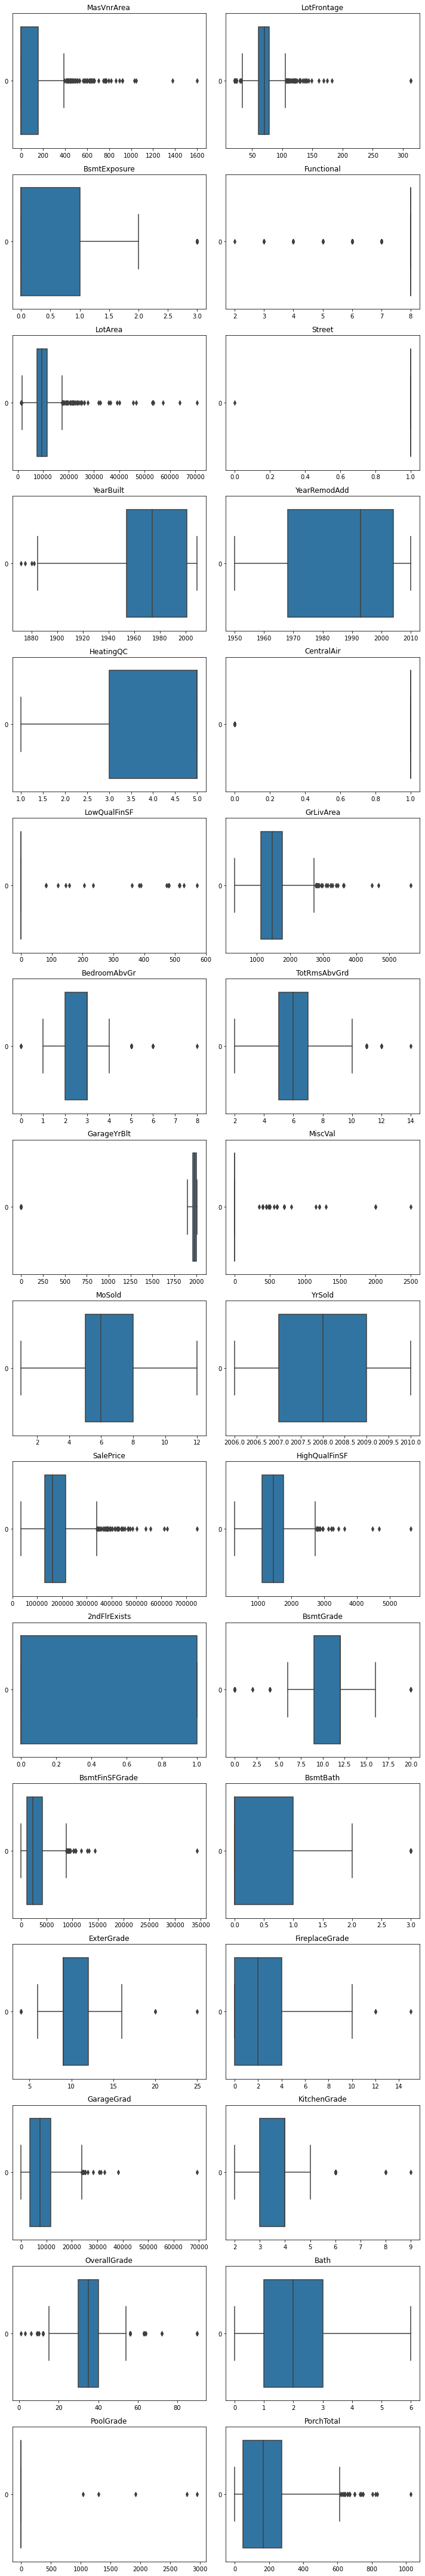

In [121]:
# Checking for outliers after all the modifications.

num_cols = ttrain_data.select_dtypes(exclude = 'object').columns.to_list()

i = 0
plt.figure(figsize = (10, 60))
for num_col in num_cols:
    i += 1
    plt.subplot(int(np.ceil(len(num_cols)/2)), 2, i)
    sb.boxplot(data = ttrain_data[num_col], orient = 'h')
    plt.title(num_col)
    plt.tight_layout()

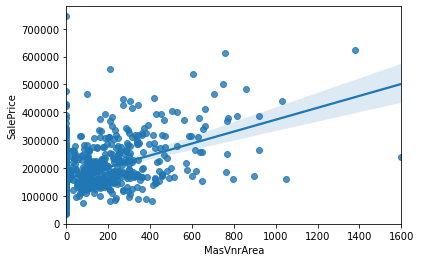

In [122]:
# MasVnrArea

sb.regplot(x = 'MasVnrArea', y = 'SalePrice', data = ttrain_data)
plt.show()

# At 'MasVnrArea' = 0 --> 'SalePrice' > 700000

In [310]:
# Removing the outliers.

ttrain_data = ttrain_data[(ttrain_data['SalePrice'] < 700000) 
                        & (ttrain_data['MasVnrArea'] < 1500)]

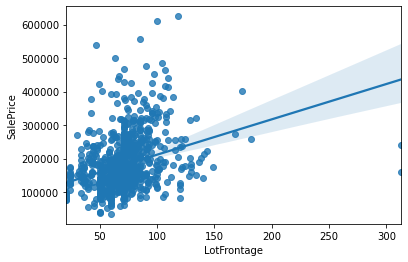

In [124]:
# LotFrontage

sb.regplot(x = 'LotFrontage', y = 'SalePrice', data = ttrain_data)
plt.show()

In [311]:
# Removing the outliers.

ttrain_data = ttrain_data[(ttrain_data['LotFrontage'] < 300)]

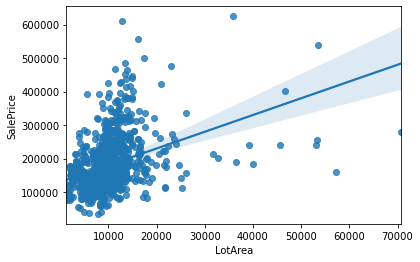

In [126]:
# LotArea

sb.regplot(x = 'LotArea', y = 'SalePrice', data = ttrain_data)
plt.show()

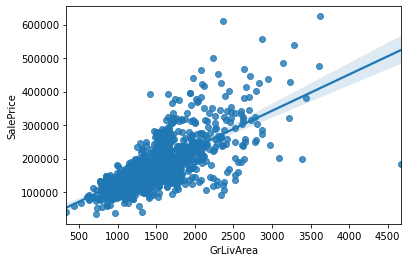

In [127]:
# GrLivArea

sb.regplot(x = 'GrLivArea', y = 'SalePrice', data = ttrain_data)
plt.show()

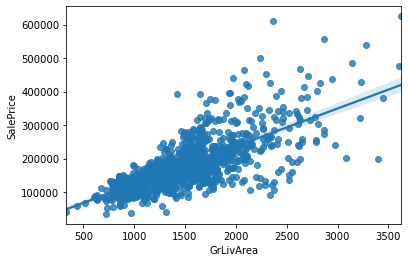

In [312]:
# Removing the outliers.

ttrain_data = ttrain_data[(ttrain_data['GrLivArea'] < 4500)]

sb.regplot(x = 'GrLivArea', y = 'SalePrice', data = ttrain_data)
plt.show()

In [313]:
# Cross checking

multicol_cols = multicolinearity(ttrain_data, 0.5)
multicol_cols

[('YearBuilt', 'YearRemodAdd'),
 ('YearBuilt', 'BsmtGrade'),
 ('YearBuilt', 'GarageGrad'),
 ('YearRemodAdd', 'HeatingQC'),
 ('YearRemodAdd', 'BsmtGrade'),
 ('YearRemodAdd', 'ExterGrade'),
 ('GrLivArea', 'BedroomAbvGr'),
 ('GrLivArea', 'TotRmsAbvGrd'),
 ('GrLivArea', 'HighQualFinSF'),
 ('GrLivArea', '2ndFlrExists'),
 ('GrLivArea', 'Bath'),
 ('BedroomAbvGr', 'TotRmsAbvGrd'),
 ('BedroomAbvGr', 'HighQualFinSF'),
 ('TotRmsAbvGrd', 'HighQualFinSF'),
 ('TotRmsAbvGrd', 'Bath'),
 ('HighQualFinSF', '2ndFlrExists'),
 ('HighQualFinSF', 'Bath'),
 ('2ndFlrExists', 'Bath'),
 ('BsmtGrade', 'GarageGrad'),
 ('BsmtFinSFGrade', 'BsmtBath'),
 ('ExterGrade', 'OverallGrade')]

In [314]:
# Notes

# After the first model try adding all the Grade and Bath features.

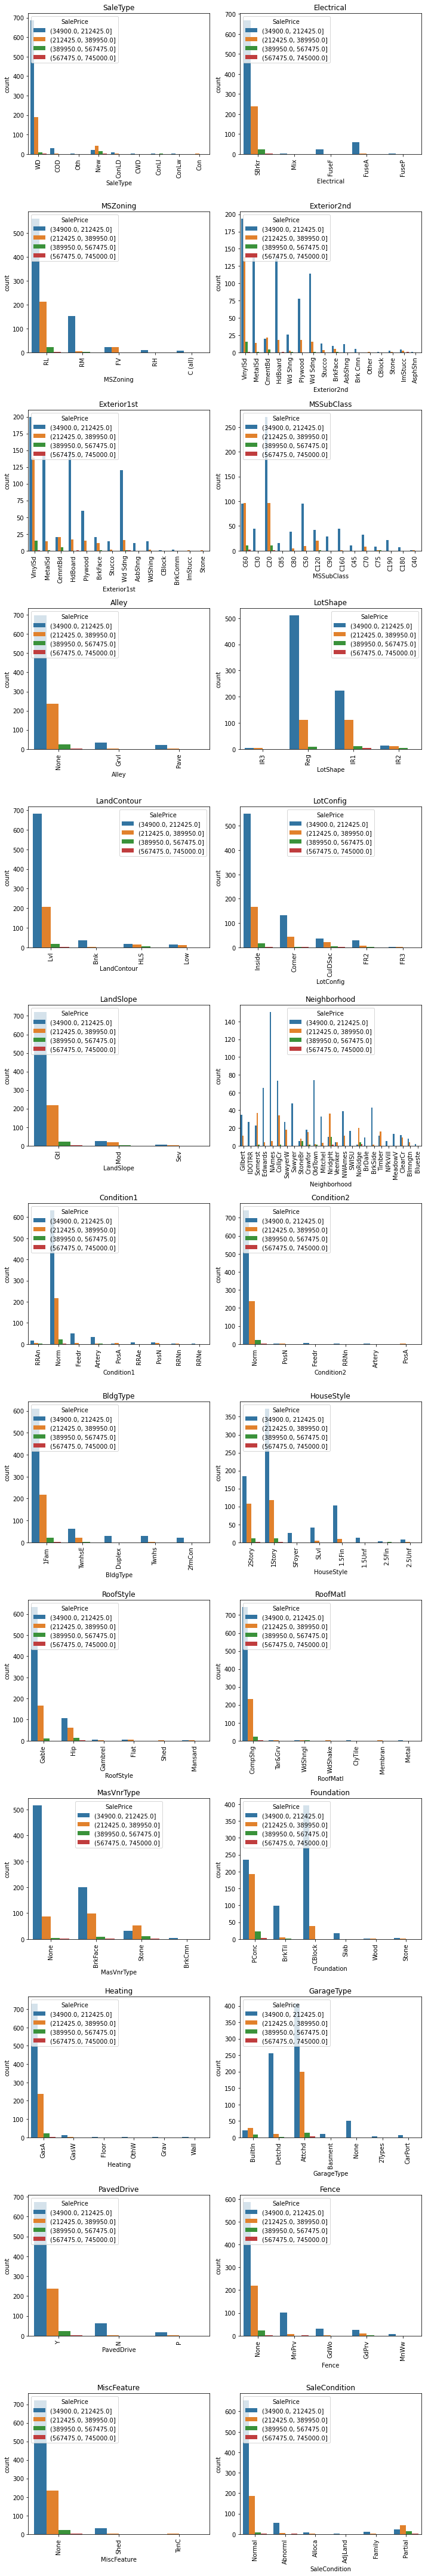

In [189]:
# Categorical data.

obj_cols = ttrain_data.select_dtypes(include = 'object').columns.to_list()
bin_size = 5
target = 'SalePrice'
bins = np.linspace(ttrain_data[target].min(), ttrain_data[target].max(), bin_size)
comp = pd.cut(ttrain_data[target], bins = bins, labels = None)

i = 0
plt.figure(figsize = (10, 60))
for obj_col in obj_cols:
    i += 1
    plt.subplot(int(np.ceil(len(obj_cols)/2)), 2, i)
    chart = sb.countplot(x = ttrain_data[obj_col], hue = comp)
    chart.set_xticklabels(chart.get_xticklabels(), rotation = 90)
    plt.title(obj_col)
    plt.tight_layout()

---

In [315]:
# One Hot Encoding the data

from sklearn.preprocessing import OneHotEncoder

In [316]:
ohe = OneHotEncoder(drop = 'first')

In [317]:
ttrain_data_ = ttrain_data.copy()
ttrain_data_fenc = ttrain_data_.drop(columns = 'SalePrice')
y_train = ttrain_data_['SalePrice']

tvalid_data_ = tvalid_data.copy()
tvalid_data_fenc = tvalid_data_.drop(columns = 'SalePrice')
y_valid = tvalid_data_['SalePrice']

ttest_data_fenc = ttest_data.copy()

print('Shape of ttrain_data_fenc is:', ttrain_data_fenc.shape)
print('Shape of y_train is:', y_train.shape)

print('Shape of tvalid_data_fenc is:', tvalid_data_fenc.shape)
print('Shape of y_valid is:', y_valid.shape)

print('Shape of ttest_data_fenc is:', ttest_data_fenc.shape)

Shape of ttrain_data_fenc is: (1012, 57)
Shape of y_train is: (1012,)
Shape of tvalid_data_fenc is: (438, 57)
Shape of y_valid is: (438,)
Shape of ttest_data_fenc is: (1459, 57)


In [318]:
# Concatenating the data. If this is not done then sometimes the
# number of columns will be different for train, valid and test data.

ttrain_slice = ttrain_data_fenc.shape[0]
tvalid_slice = ttrain_data_fenc.shape[0] + tvalid_data_fenc.shape[0]

data_encoding = pd.concat([ttrain_data_fenc, tvalid_data_fenc, 
                           ttest_data_fenc], axis = 0)

data_encoding.reset_index(drop = True, inplace = True)

In [319]:
data_encoding.shape

(2909, 57)

In [320]:
nominal_cols = ttrain_data.select_dtypes(include = 'object').columns.to_list()
nominal_data = data_encoding[nominal_cols]
rest_data = data_encoding.drop(columns = nominal_cols)

In [321]:
# Applying OneHotEncoder.

nominal_data_enc = ohe.fit_transform(nominal_data).toarray()
nominal_data_cols =  ohe.get_feature_names(nominal_data.columns.to_list())

encoded_nominal_data = pd.DataFrame(nominal_data_enc, 
                                    columns = nominal_data_cols)

encoded_data = pd.concat([rest_data, encoded_nominal_data], axis = 1)

print('Encoded_data shape is:', encoded_data.shape)

Encoded_data shape is: (2909, 199)


In [322]:
# Splitting the data.

enc_train_data = encoded_data.iloc[0: ttrain_slice, :]
enc_valid_data = encoded_data.iloc[ttrain_slice: tvalid_slice, :]
enc_test_data = encoded_data.iloc[tvalid_slice: , :]

In [323]:
# Confirming the number of rows.

assert ttrain_data.shape[0] == enc_train_data.shape[0]
assert tvalid_data.shape[0] == enc_valid_data.shape[0]
assert ttest_data.shape[0] == enc_test_data.shape[0]

In [324]:
# Cross checking for object columns.

# Training data
print(enc_train_data.select_dtypes(include = 'object').keys().to_list())
print('enc_train_data doesn"t have object columns after ohe. \n')

# Validation data
print(enc_valid_data.select_dtypes(include = 'object').keys().to_list())
print('enc_valid_data has object columns after ohe. \n')

# Test data
print(enc_test_data.select_dtypes(include = 'object').keys().to_list())
print('enc_test_data has object columns after ohe.')

[]
enc_train_data doesn"t have object columns after ohe. 

[]
enc_valid_data has object columns after ohe. 

[]
enc_test_data has object columns after ohe.


In [325]:
# Columns for log transformation.

# Additional columns on which log transformation cannot be applied.
additional_cols = ['SalePrice', 'TotRmsAbvGrd', 'BedroomAbvGr', 
                   'BsmtBath', 'Bath']

log_trans_cols = list(set(ttrain_data.columns) 
                    - set(no_log_trans + additional_cols))

print(log_trans_cols)

['MasVnrArea', 'OverallGrade', 'YearBuilt', 'KitchenGrade', 'LotFrontage', 'HighQualFinSF', 'YearRemodAdd', 'GrLivArea', 'MiscVal', 'ExterGrade', 'MoSold', 'YrSold', 'FireplaceGrade', 'LowQualFinSF', 'PoolGrade', 'BsmtFinSFGrade', 'LotArea', 'GarageGrad', '2ndFlrExists', 'PorchTotal', 'BsmtGrade', 'GarageYrBlt']


In [326]:
# Log transformation and Scaling

from sklearn.preprocessing import StandardScaler

stdscaler = StandardScaler()

# Log Transformation
skewness = enc_train_data[log_trans_cols].apply(lambda x: scistats.skew(x))
skewed_cols = skewness[skewness > 0.75].keys().to_list()

In [327]:
# Applying log transformation

for col in skewed_cols:
    enc_train_data.insert(loc = 0, column = 'log' + col, 
                          value = np.log1p(enc_train_data[col]))
    enc_valid_data.insert(loc = 0, column = 'log' + col, 
                          value = np.log1p(enc_valid_data[col]))
    enc_test_data.insert(loc = 0, column = 'log' + col, 
                          value = np.log1p(enc_test_data[col]))
    
print('enc_train_data shape is:', enc_train_data.shape)

enc_train_data shape is: (1012, 212)


In [328]:
# Dropping the skewed columns

enc_train_data = enc_train_data.drop(columns = skewed_cols)
enc_valid_data = enc_valid_data.drop(columns = skewed_cols)
enc_test_data = enc_test_data.drop(columns = skewed_cols)

print('enc_train_data shape is:', enc_train_data.shape)

enc_train_data shape is: (1012, 199)


In [329]:
# Cross checking for null values due to log transformation.

print('Null values in enc_train_data is:', 
      {enc_train_data.isnull().sum().sum()})
print('Null values in enc_valid_data is:', 
      {enc_valid_data.isnull().sum().sum()})
print('Null values in enc_test_data is:', 
      {enc_test_data.isnull().sum().sum()})

Null values in enc_train_data is: {0}
Null values in enc_valid_data is: {0}
Null values in enc_test_data is: {0}


In [330]:
# Scaling the data

scaled_train_data_array = stdscaler.fit_transform(enc_train_data)
scaled_valid_data_array = stdscaler.transform(enc_valid_data)
scaled_test_data_array = stdscaler.transform(enc_test_data)

enc_train_data = pd.DataFrame(scaled_train_data_array, 
                              columns = enc_train_data.columns.to_list())
enc_valid_data  = pd.DataFrame(scaled_valid_data_array, 
                               columns = enc_valid_data.columns.to_list())
enc_test_data  = pd.DataFrame(scaled_test_data_array, 
                              columns = enc_test_data.columns.to_list())

In [331]:
# Ensuring Features are arranged.

cols = enc_train_data.columns.to_list()

enc_train_data = enc_train_data[cols]
enc_valid_data = enc_valid_data[cols]
enc_test_data = enc_test_data[cols]

In [332]:
print('Shape of enc_train_data is:', enc_train_data.shape)
print('Shape of y_train is:', y_train.shape)

print('Shape of enc_valid_data is:', enc_valid_data.shape)
print('Shape of y_valid is:', y_valid.shape)

print('Shape of enc_test_data is:', enc_test_data.shape)

Shape of enc_train_data is: (1012, 199)
Shape of y_train is: (1012,)
Shape of enc_valid_data is: (438, 199)
Shape of y_valid is: (438,)
Shape of enc_test_data is: (1459, 199)


In [149]:
# Final datasets

# Training data
 # enc_train_data
 # y_train
    
# Validation data
 # enc_valid_data
 # y_valid

# Testing data
 # enc_test_data

print('Shape of enc_train_data is:', enc_train_data.shape)
print('Shape of y_train is:', y_train.shape)

print('Shape of enc_valid_data is:', enc_valid_data.shape)
print('Shape of y_valid is:', y_valid.shape)

print('Shape of enc_test_data is:', enc_test_data.shape)

Shape of enc_train_data is: (1012, 199)
Shape of y_train is: (1012,)
Shape of enc_valid_data is: (438, 199)
Shape of y_valid is: (438,)
Shape of enc_test_data is: (1459, 199)


---

### 7. Developing models

In [150]:
y_train.reset_index(drop = True, inplace = True)
y_valid.reset_index(drop = True, inplace = True)

In [151]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

##### 7.1 Model1

R2 value is: 0.1446
Adj_R2 value is: -0.0544
MSE on Training data is: 33029424627.2744
Data is not Normally Distributed.


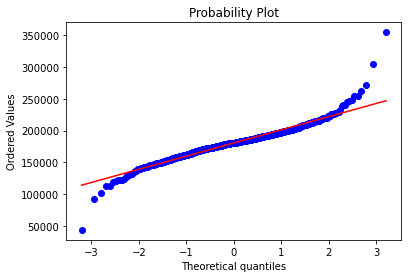

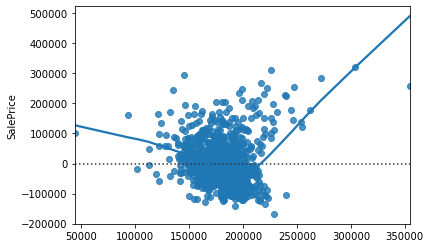

Data is homoscedastic.


In [152]:
# Training data
X_t1 = enc_train_data.copy()
y_t1 = y_train.copy()
X_v1 = enc_valid_data.copy()
y_v1 = y_valid.copy()

def MLmodel(X_train, y_train):
    model = statmod.OLS(y_train, X_train)
    result = model.fit()

    t_res = result.predict(X_train)
    t_mse = mean_squared_error(y_train, t_res)

    print('R2 value is:', np.round(result.rsquared, 4))
    print('Adj_R2 value is:', np.round(result.rsquared_adj, 4))
    print('MSE on Training data is:', np.round(t_mse, 4))
 
    plt.figure()
    scistats.probplot(x = y_train - t_res, dist = 'norm', plot = plt)
    plt.plot()
    
    p_val = scistats.shapiro(y_train - t_res)[1]
    if p_val < 0.05:
        print('Data is not Normally Distributed.')
    else:
        print('Data is Normally Distributed.')
        
        
    plt.figure()
    sb.residplot(x = (y_train - t_res), y = y_train, lowess = True)
    plt.show()
    
    from statsmodels.stats.diagnostic import het_breuschpagan
    # Hypothesis
    # H0 - Data is homoscedastic
    # H1 - Data is heteroscedastic

    # p-value < 0.05 , reject H0 
    # p-value > 0.05 , accept H0 
    
    p_val = het_breuschpagan(result.resid, result.model.exog)[-1]
    if p_val < 0.05:
        print('Data is heteroscedastic.')
    else:
        print('Data is homoscedastic.')
        
    return result

#------------------------------------------------------------------------------

# Model1
res1 = MLmodel(X_t1, y_t1)

##### 7.2 Model2

R2 value is: 0.9241
Adj_R2 value is: 0.9064
MSE on Training data is: 458800701.7189
Data is not Normally Distributed.


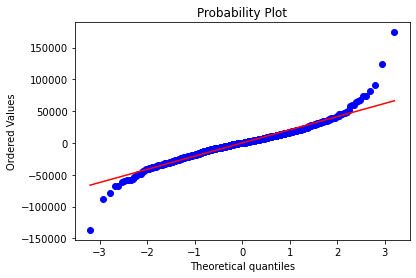

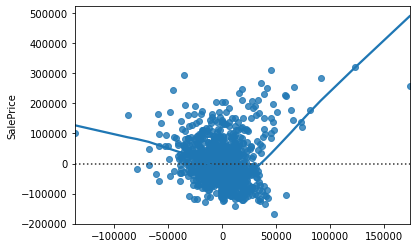

Data is heteroscedastic.


In [153]:
# Adding a constant

# Training data
X_t2 = enc_train_data.copy()
X_t2 = statmod.add_constant(X_t2, prepend = True)
y_t2 = y_train.copy()

# Model2
res2 = MLmodel(X_t2, y_t2)

# Conclusion
# Model2 is better than Model1

##### 7.3 Model3

R2 value is: 0.9443
Adj_R2 value is: 0.9314
MSE on Training data is: 0.0088
Data is not Normally Distributed.


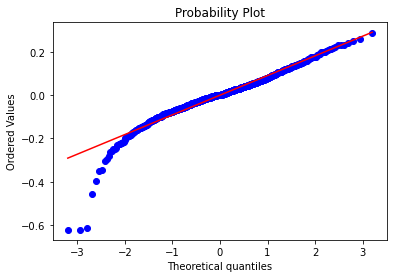

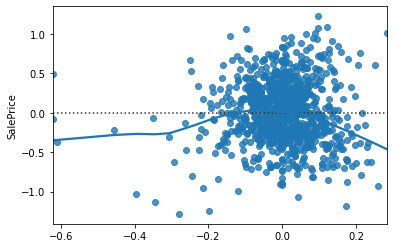

Data is homoscedastic.


In [154]:
# Using log on y_train to normally distribute it.

# Training data
X_t3 = enc_train_data.copy()
X_t3 = statmod.add_constant(X_t3, prepend = True)
y_t3 = y_train.copy()
y_t3 = np.log(y_t3)

# Model3
res3 = MLmodel(X_t3, y_t3)

# Conclusion
# Model3 is better than Model2

#### 7.1 Modifying the data

In [219]:
# Adding all the grades and bath to minimize multicollinearty

grade_cols = ['BsmtGrade','logExterGrade', 'Bath', 'logKitchenGrade', 
              'logFireplaceGrade', 'logPoolGrade', 'logGarageGrad',
              'logBsmtFinSFGrade', 'BsmtBath', 'OverallGrade']

In [220]:
mod_train_data = enc_train_data.copy()
mod_valid_data = enc_valid_data.copy()
mod_test_data = enc_test_data.copy()

mod_train_data['AllGrades'] = (mod_train_data['BsmtGrade']
                             + mod_train_data['logExterGrade']
                             + mod_train_data['logKitchenGrade']
                             + mod_train_data['logFireplaceGrade']
                             + mod_train_data['logPoolGrade']
                             + mod_train_data['logGarageGrad']
                             + mod_train_data['logBsmtFinSFGrade']
                             + mod_train_data['OverallGrade'])

mod_train_data['AllBaths'] = mod_train_data['Bath'] + mod_train_data['BsmtBath']

mod_valid_data['AllGrades'] = (mod_valid_data['BsmtGrade']
                             + mod_valid_data['logExterGrade']
                             + mod_valid_data['logKitchenGrade']
                             + mod_valid_data['logFireplaceGrade']
                             + mod_valid_data['logPoolGrade']
                             + mod_valid_data['logGarageGrad']
                             + mod_valid_data['logBsmtFinSFGrade']
                             + mod_valid_data['OverallGrade'])

mod_valid_data['AllBaths'] = mod_valid_data['Bath'] + mod_valid_data['BsmtBath']

mod_test_data['AllGrades'] =  (mod_test_data['BsmtGrade']
                             + mod_test_data['logExterGrade']
                             + mod_test_data['logKitchenGrade']
                             + mod_test_data['logFireplaceGrade']
                             + mod_test_data['logPoolGrade']
                             + mod_test_data['logGarageGrad']
                             + mod_test_data['logBsmtFinSFGrade']
                             + mod_test_data['OverallGrade'])

mod_test_data['AllBaths'] = mod_test_data['Bath'] + mod_test_data['BsmtBath']

# Dropping columns
mod_train_data.drop(columns = grade_cols, inplace = True)
mod_valid_data.drop(columns = grade_cols, inplace = True)
mod_test_data.drop(columns = grade_cols, inplace = True)

##### 7.1.1 Model4

R2 value is: 0.9368
Adj_R2 value is: 0.9229
MSE on Training data is: 0.01
Data is not Normally Distributed.


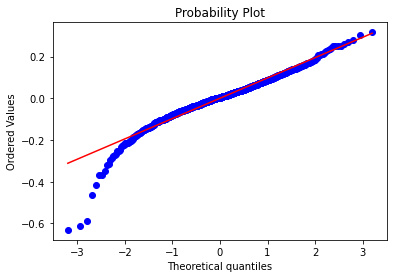

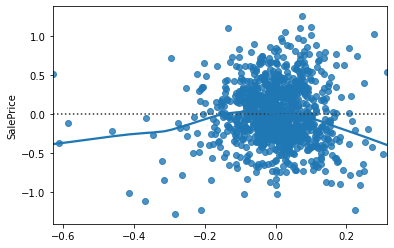

Data is homoscedastic.


In [164]:
# Training data
X_t4 = mod_train_data.copy()
X_t4 = statmod.add_constant(X_t4, prepend = True)
y_t4 = y_train.copy()
y_t4 = np.log(y_t4)

# Model4
res4 = MLmodel(X_t4, y_t4)

# Conclusion
# Model3 is better than Model4. 
# For now I will be using enc_train_data.

Will use the modified data in the end.

#### 7.2 Finding the best Method.

##### 7.2.1 LinearRegression Model

In [192]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

# Training data
Xt_lr1 = enc_train_data.copy()
yt_lr1 = y_train.copy()
yt_lr1 = np.log(yt_lr1)


lr = LinearRegression(fit_intercept = True)
lrmodel_score = cross_val_score(estimator = lr, X = Xt_lr1, y = yt_lr1, 
                                cv = 10, scoring = 'neg_mean_squared_error')

print('MSE for LR model is:', np.round((-lrmodel_score).mean(), 4))

MSE for LR model is: 7.046735006683244e+23


##### Conclusion:
High values of MSE indicates that the LinearRegression model is overfitting.

##### 7.2.1 Ridge and Lasso Regression Model

In [193]:
from sklearn.linear_model import Ridge, Lasso

lambda_ = 1
ridgelr = Ridge(alpha = lambda_, fit_intercept = True)
ridgemodel_score = cross_val_score(estimator = ridgelr, X = Xt_lr1, y = yt_lr1,
                                   cv = 10, scoring = 'neg_mean_squared_error')

lassolr = Lasso(alpha = lambda_, fit_intercept = True)
lassomodel_score = cross_val_score(estimator = lassolr, X = Xt_lr1, y = yt_lr1,
                                   cv = 10, scoring = 'neg_mean_squared_error')

In [194]:
print(f'MSE for Ridge model with alpha({lambda_}):', 
      np.round((-ridgemodel_score).mean(), 4))

print(f'MSE for Lasso model with alpha({lambda_}):', 
      np.round((-lassomodel_score).mean(), 4))

MSE for Ridge model with alpha(1): 0.0176
MSE for Lasso model with alpha(1): 0.1584


##### 7.2.2 RandomForestRegressor Model

In [197]:
rf = RandomForestRegressor()
rfmodel_score = cross_val_score(estimator = rf, X = Xt_lr1, y = yt_lr1, 
                                cv = 10, scoring = 'neg_mean_squared_error')

print('MSE for RF model is:', np.round((-rfmodel_score).mean(), 4))

MSE for RF model is: 0.0187


##### 7.2.3 GradientBoostingRegressor Model

In [198]:
gbr = GradientBoostingRegressor()
gbrmodel_score = cross_val_score(estimator = gbr, X = Xt_lr1, y = yt_lr1, 
                                 cv = 10, scoring = 'neg_mean_squared_error')

print('MSE for Gradient Boost model is:', 
      np.round((-gbrmodel_score).mean(), 4))

MSE for Gradient Boost model is: 0.016


##### Conclusion:
GradientBoosting model is better than RandomForest, Ridge and Lasso model.

#### Choosing GradientBoosting model for fine tuning.

---
### 8. Fine tuning the model

In [171]:
from sklearn.model_selection import GridSearchCV

In [199]:
# Fine tuning 'n_estimators'

param_test1 = {'n_estimators': range(10, 501, 100)}

gbr = GradientBoostingRegressor(learning_rate = 0.1)
gbrmodel_scores = GridSearchCV(gbr, param_grid = param_test1, cv = 5).fit(Xt_lr1, yt_lr1)

In [200]:
print('Best parameters are:', gbrmodel_scores.best_params_)
print('Best score is:', np.round(gbrmodel_scores.best_score_, 4))

Best parameters are: {'n_estimators': 410}
Best score is: 0.8951


#### Note
Optimal number of estimator is '410' for '0.1' learning rate. Trying a higher learning rate as high number of estimator will slow down the cross validation process.

In [201]:
# Increasing the learning rate.

learning_rate_list = [0.2, 0.3, 0.4, 0.5, 1, 1.2]

for lr in learning_rate_list:
    param_test1 = {'n_estimators': range(10, 501, 100)}

    gbr = GradientBoostingRegressor(learning_rate = lr)
    gbrmodel_scores = GridSearchCV(gbr, param_grid = param_test1, cv = 5).fit(Xt_lr1, yt_lr1)
    
    print('For Learning rate:', lr)
    print('Best parameters are:', gbrmodel_scores.best_params_)
    print('Best score is:', np.round(gbrmodel_scores.best_score_, 4))
    print('\n')

For Learning rate: 0.2
Best parameters are: {'n_estimators': 210}
Best score is: 0.89


For Learning rate: 0.3
Best parameters are: {'n_estimators': 410}
Best score is: 0.8817


For Learning rate: 0.4
Best parameters are: {'n_estimators': 310}
Best score is: 0.8716


For Learning rate: 0.5
Best parameters are: {'n_estimators': 410}
Best score is: 0.8559


For Learning rate: 1
Best parameters are: {'n_estimators': 10}
Best score is: 0.7632


For Learning rate: 1.2
Best parameters are: {'n_estimators': 10}
Best score is: 0.7052




In [202]:
# Using learning rate of 0.2 later it will be made smaller.
# Fine tuning 'max_depth' and 'min_samples_split'.

param_test2 = {'max_depth': range(6, 15, 2), 
               'min_samples_split': range(50, 200 + 1, 50)}

gbr = GradientBoostingRegressor(learning_rate = 0.2, n_estimators = 210)
gbrmodel_scores = GridSearchCV(gbr, param_grid = param_test2, cv = 5).fit(Xt_lr1, yt_lr1)

In [203]:
print('Best parameters are:', gbrmodel_scores.best_params_)
print('Best score is:', np.round(gbrmodel_scores.best_score_, 4))

Best parameters are: {'max_depth': 8, 'min_samples_split': 150}
Best score is: 0.8924


In [204]:
# Fine tuning 'max_features'.

param_test3 = {'max_features': range(10, 50 + 1, 10)}

gbr = GradientBoostingRegressor(learning_rate = 0.2, n_estimators = 210, 
                                max_depth = 8, min_samples_split = 150)
gbrmodel_scores = GridSearchCV(gbr, param_grid = param_test4, cv = 5).fit(Xt_lr1, yt_lr1)

In [205]:
print('Best parameters are:', gbrmodel_scores.best_params_)
print('Best score is:', np.round(gbrmodel_scores.best_score_, 4))

Best parameters are: {'max_features': 20}
Best score is: 0.8896


In [206]:
# Fine tuning 'subsample'.

param_test4 = {'subsample': [0.6,0.7,0.75,0.8,0.85,0.9, 0.95, 1]}

gbr = GradientBoostingRegressor(learning_rate = 0.2, n_estimators = 210, 
                                max_depth = 8, min_samples_split = 150,
                                max_features = 20)
gbrmodel_scores = GridSearchCV(gbr, param_grid = param_test5, cv = 5).fit(Xt_lr1, yt_lr1)

In [207]:
print('Best parameters are:', gbrmodel_scores.best_params_)
print('Best score is:', np.round(gbrmodel_scores.best_score_, 4))

Best parameters are: {'subsample': 1}
Best score is: 0.8889


#### Optimal parameters are
- learning_rate = 0.2, <br>
- n_estimators = 210, <br>
- max_depth = 8, <br>
- min_samples_split = 150, <br>
- max_features = default (From param_test2), <br>
- subsample = default

#### Reducing Learning rate and increasing n_estimators.

In [208]:
# Reducing learning rate by a fraction of 10.

frac = 10
lr = 1/frac
n_est = 210*frac

gbr = GradientBoostingRegressor(learning_rate = lr, n_estimators = n_est, 
                                max_depth = 8, min_samples_split = 150)
gbrmodel_scores = cross_val_score(gbr, X = Xt_lr1, y = yt_lr1, cv = 5)

print('Score is:', np.round(gbrmodel_scores.mean(), 4))

Score is: 0.896


In [209]:
# Reducing learning rate by a fraction of 20.

frac = 20
lr = 1/frac
n_est = 210*frac

gbr = GradientBoostingRegressor(learning_rate = lr, n_estimators = n_est, 
                                max_depth = 8, min_samples_split = 150)
gbrmodel_scores = cross_val_score(gbr, X = Xt_lr1, y = yt_lr1, cv = 5)

print('Score is:', np.round(gbrmodel_scores.mean(), 4))

Score is: 0.897


In [210]:
# Using warm start.

frac = 20
lr = 1/frac
n_est = 210*frac

gbr = GradientBoostingRegressor(learning_rate = lr, n_estimators = n_est, 
                                max_depth = 8, min_samples_split = 150, 
                                warm_start = True)
gbrmodel_scores = cross_val_score(gbr, X = Xt_lr1, y = yt_lr1, cv = 5)

print('Score is:', np.round(gbrmodel_scores.mean(), 4))

Score is: 0.8976


In [211]:
# max_features = 'sqrt' and loss='huber'
 
frac = 20
lr = 1/frac
n_est = 210*frac

gbr = GradientBoostingRegressor(learning_rate = lr, n_estimators = n_est, 
                                max_depth = 8, min_samples_split = 150,
                                max_features = 'sqrt', 
                                warm_start = True, loss = 'huber')
gbrmodel_scores = cross_val_score(gbr, X = Xt_lr1, y = yt_lr1, cv = 5)

print('Score is:', np.round(gbrmodel_scores.mean(), 4))

Score is: 0.8995


In [212]:
# Reducing learning rate by a fraction of 50.

frac = 50
lr = 1/frac
n_est = 210*frac

gbr = GradientBoostingRegressor(learning_rate = lr, n_estimators = n_est, 
                                max_depth = 8, min_samples_split = 150,
                                max_features = 20, warm_start = True)
gbrmodel_scores = cross_val_score(gbr, X = Xt_lr1, y = yt_lr1, cv = 5)

print('Score is:', np.round(gbrmodel_scores.mean(), 4))

Score is: 0.9036


In [213]:
# with max_features = 'sqrt' and loss='huber'.

frac = 50
lr = 1/frac
n_est = 210*frac

gbr = GradientBoostingRegressor(learning_rate = lr, n_estimators = n_est, 
                                max_depth = 8, min_samples_split = 150,
                                max_features = 'sqrt', loss='huber',
                                warm_start = True)
gbrmodel_scores = cross_val_score(gbr, X = Xt_lr1, y = yt_lr1, cv = 5)

print('Score is:', np.round(gbrmodel_scores.mean(), 4))

Score is: 0.9004


#### GradientBoosting Regressor model tuned parameters.
- learning_rate = 1/50, <br>
- n_estimators = 210*50, <br>
- max_depth = 8, <br>
- min_samples_split = 150, <br>
- max_features = 20, <br> 
- warm_start = True

---
#### 9. Predicting values for test data
Predicting on enc_train_data.

MSE on Training data is: 0.0
Mean error is: -0.0
Data is not Normally Distributed.


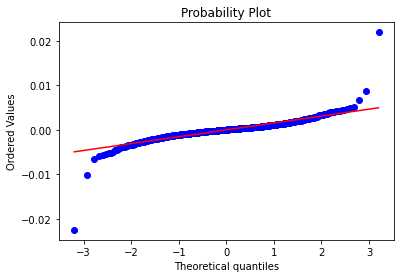

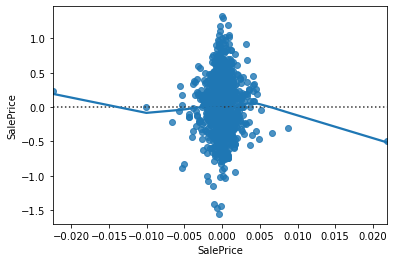

In [222]:
Xf_train = enc_train_data.copy()

yf_train = y_train.copy()
yf_train = np.log(yf_train)

gbr = GradientBoostingRegressor(learning_rate = 1/50, n_estimators = 210*50, 
                                max_depth = 8, min_samples_split = 150,
                                max_features = 20, warm_start = True)

gbr.fit(Xf_train, yf_train)

t_res = gbr.predict(Xf_train)
t_mse = mean_squared_error(yf_train, t_res)
residuals = yf_train - t_res

print('MSE on Training data is:', np.round(t_mse, 4))
print('Mean error is:', np.round((residuals).mean(), 4))

# Error should be normally distributed
plt.figure()
scistats.probplot(x = residuals, dist = 'norm', plot = plt)
plt.plot()

p_val = scistats.shapiro(residuals)[1]
if p_val < 0.05:
    print('Data is not Normally Distributed.')
else:
    print('Data is Normally Distributed.')

# Check for homoscedasticity.
plt.figure()
sb.residplot(x = (residuals), y = yf_train, lowess = True)
plt.show()

In [225]:
# Predicting

X_test = enc_test_data.copy()

y_test_pred = gbr.predict(X_test)

# y_test_pred is in log form
# Conversion
y_test_pred = np.exp(y_test_pred)

---
#### 10. Kaggle Submission

In [227]:
test_result = pd.DataFrame({'Id': raw_test['Id'].values,
                            'SalePrice': y_test_pred})

In [228]:
test_result.to_csv('HousingPrice_kaggle_submission_4attempt.csv', 
                   index = False)

In [230]:
pd.DataFrame({'Scores': [0.14348, 0.14592, 0.14222, 0.13525]}, 
             index = ['First_attempt', 'Second_attempt', 'Third_attempt',
                      'Fourth_attempt'])

,Scores
First_attempt,0.14348
Second_attempt,0.14592
Third_attempt,0.14222
Fourth_attempt,0.13525


---
#### 11. Predicting on modified data

MSE on Training data is: 0.0
Mean error is: 0.0
Data is not Normally Distributed.


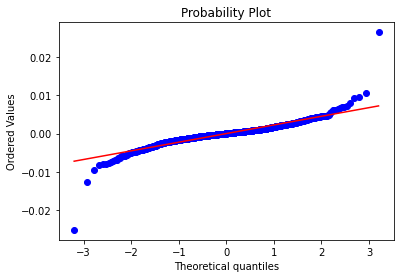

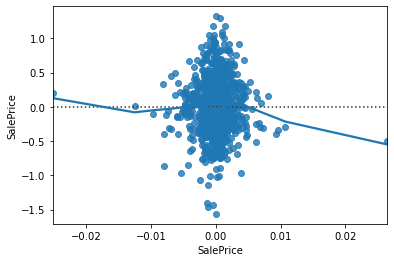

In [231]:
Xf_train = mod_train_data.copy()

yf_train = y_train.copy()
yf_train = np.log(yf_train)

gbr = GradientBoostingRegressor(learning_rate = 1/50, n_estimators = 210*50, 
                                max_depth = 8, min_samples_split = 150,
                                max_features = 20, warm_start = True)

gbr.fit(Xf_train, yf_train)

t_res = gbr.predict(Xf_train)
t_mse = mean_squared_error(yf_train, t_res)
residuals = yf_train - t_res

print('MSE on Training data is:', np.round(t_mse, 4))
print('Mean error is:', np.round((residuals).mean(), 4))

# Error should be normally distributed
plt.figure()
scistats.probplot(x = residuals, dist = 'norm', plot = plt)
plt.plot()

p_val = scistats.shapiro(residuals)[1]
if p_val < 0.05:
    print('Data is not Normally Distributed.')
else:
    print('Data is Normally Distributed.')

# Check for homoscedasticity.
plt.figure()
sb.residplot(x = (residuals), y = yf_train, lowess = True)
plt.show()

In [232]:
# Predicting

X_test = mod_test_data.copy()

y_test_pred = gbr.predict(X_test)

# y_test_pred is in log form
# Conversion
y_test_pred = np.exp(y_test_pred)

---
#### 12. Kaggle Submission

In [233]:
test_result = pd.DataFrame({'Id': raw_test['Id'].values,
                            'SalePrice': y_test_pred})

In [234]:
test_result.to_csv('HousingPrice_kaggle_submission_5attempt.csv', index = False)

In [235]:
pd.DataFrame({'Scores': [0.14348, 0.14592, 0.14222, 0.13525, 0.14373]}, 
             index = ['First_attempt', 'Second_attempt', 'Third_attempt',
                      'Fourth_attempt', 'Fifth_attempt'])

,Scores
First_attempt,0.14348
Second_attempt,0.14592
Third_attempt,0.14222
Fourth_attempt,0.13525
Fifth_attempt,0.14373


---
#### 13. Further improvements.
1) More improvements need to be done on Feature Engineering as mod_train_data is not giving good results.<br>
2) Simplifying the codes.